In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import folium
import plotly.express as px
import plotly.graph_objects as go
import calendar
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, learning_curve
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from xgboost import XGBClassifier

## Importing dataset

In [39]:
df = pd.read_csv('hotel_bookings.csv',sep=',')
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

## Data cleaning

- The dataset have 119390 records and 32 attributes

In [40]:
df.shape

(119390, 32)

- We can see in the count column the total number of values ​​is 119390 and if it is less than that number then that attribute has missing values.
- The mean column tells us the average value of the columns (eg 'is_canceled' is 0.37, which means that 37% of people in the dataset canceled their booking)
- STD shows the standard deviation of each column.
- Min and max indicate the highest and largest values ​​of columns in the data set
- 25%, 50%, 75% indicate the quantiles

In [41]:
df.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [43]:
#Function to print unique value of each columns in df
def printUniqueValue(df):
    for i in df.columns:
        print("Number of unique values in", i, "is", df[i].nunique())

printUniqueValue(df)

Number of unique values in hotel is 2
Number of unique values in is_canceled is 2
Number of unique values in lead_time is 479
Number of unique values in arrival_date_year is 3
Number of unique values in arrival_date_month is 12
Number of unique values in arrival_date_week_number is 53
Number of unique values in arrival_date_day_of_month is 31
Number of unique values in stays_in_weekend_nights is 17
Number of unique values in stays_in_week_nights is 35
Number of unique values in adults is 14
Number of unique values in children is 5
Number of unique values in babies is 5
Number of unique values in meal is 5
Number of unique values in country is 177
Number of unique values in market_segment is 8
Number of unique values in distribution_channel is 5
Number of unique values in is_repeated_guest is 2
Number of unique values in previous_cancellations is 15
Number of unique values in previous_bookings_not_canceled is 73
Number of unique values in reserved_room_type is 10
Number of unique values

- Find columns with missing values ​​and calculate the ratio

In [44]:
# Find the number of missing values in each column
missing_values = df.isnull().sum()

# Calculate the ratio of missing values in each column as a percentage
missing_ratio = (missing_values / len(df)) * 100

# Combine the results into a single DataFrame for better readability
missing_data_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Ratio (%)': missing_ratio
})

# Print the summary
missing_data_summary


Missing Values  Missing Ratio (%)
hotel                                        0           0.000000
is_canceled                                  0           0.000000
lead_time                                    0           0.000000
arrival_date_year                            0           0.000000
arrival_date_month                           0           0.000000
arrival_date_week_number                     0           0.000000
arrival_date_day_of_month                    0           0.000000
stays_in_weekend_nights                      0           0.000000
stays_in_week_nights                         0           0.000000
adults                                       0           0.000000
children                                     4           0.003350
babies                                       0           0.000000
meal                                         0           0.000000
country                                    488           0.408744
market_segment                               0           0.000000
distribution_channel                         0           0.000000
is_repeated_guest                            0           0.000000
previous_cancellations                       0           0.000000
previous_bookings_not_canceled               0           0.000000
reserved_room_type                           0           0.000000
assigned_room_type                           0           0.000000
booking_changes                              0           0.000000
deposit_type                                 0           0.000000
agent                                    16340          13.686238
company                                 112593          94.306893
days_in_waiting_list                         0           0.000000
customer_type                                0           0.000000
adr                                          0           0.000000
required_car_parking_spaces                  0           0.000000
total_of_special_requests                    0           0.000000
reservation_status                           0           0.000000
reservation_status_date                      0           0.000000

- Replace reasonable value of columns value that has few missing values
- Filter out column that has children, adult, babies = 0
- Drop "company" column which has 94% of it being missing values

In [45]:
replace_null_value = {"children": 0.0, "country": "Unknown", "agent": 0}
df = df.fillna(replace_null_value)
df.drop('company', axis=1, inplace=True)
df['meal']= df['meal'].replace('Undefined', 'SC')
df = df[df['market_segment'] != 'Undefined']

filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)
df = df[~filter]

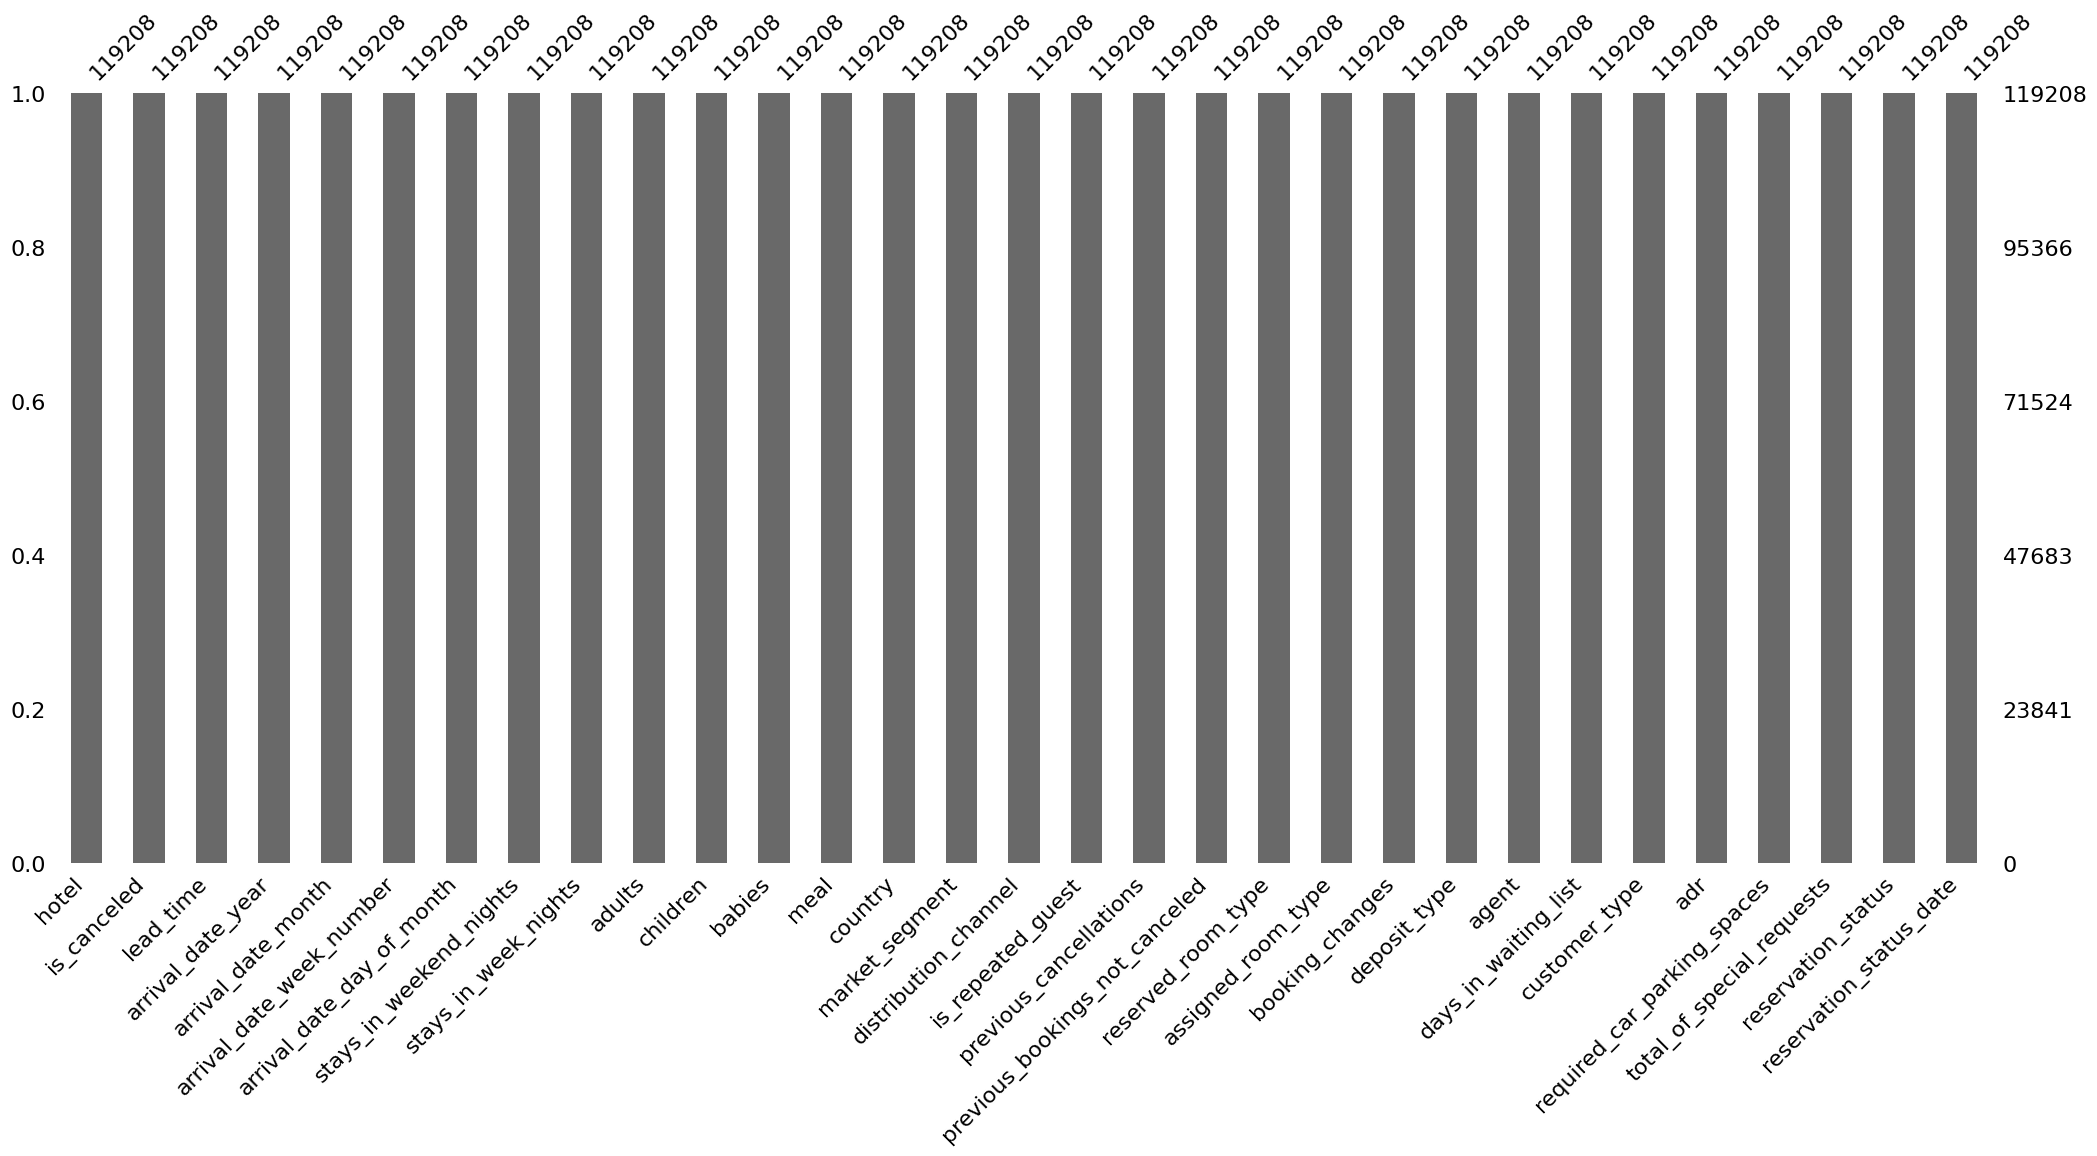

In [46]:
msno.bar(df)
plt.show()

- Check to see how many records have been dropped and the percentage of dropped data

In [47]:
df.shape
dropped_percentage = 100 - (df.shape[0] / 119390 * 100)
print("Size of data:", df.shape, "Percentage of data dropped:", dropped_percentage, '%')

Size of data: (119208, 31) Percentage of data dropped: 0.15244157802160885 %


## EDA (Exploratory Data Analysis)

### 1. Overview of that dataset

- From the Histogram chart above, we can get a more general view of the data and select the components that we want to analyze further.

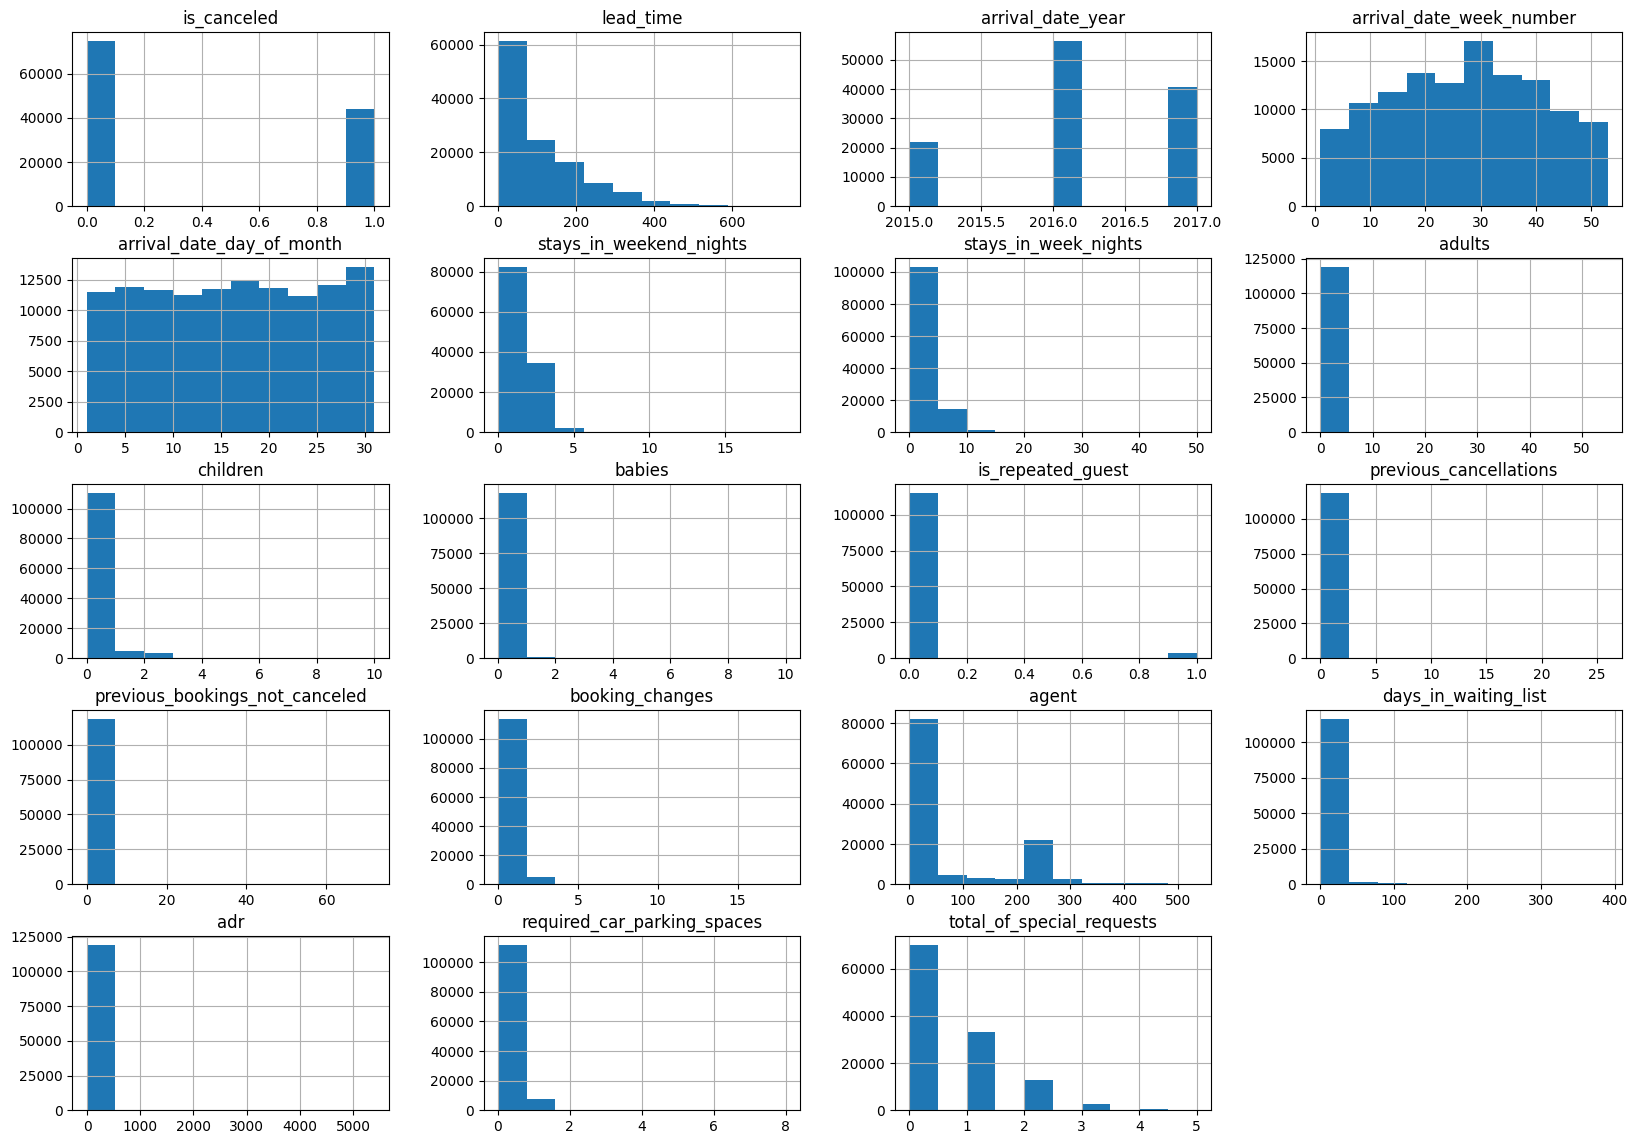

In [48]:
df.hist(figsize=(20,14))
plt.show()

### 2. Where customers come from in the world

In [49]:
guest_by_country = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
guest_by_country.rename(columns={"count": "Number of Guests"}, inplace=True)

base_map = folium.Map()
guests_map = px.choropleth(guest_by_country, locations = guest_by_country['country'],
                        color = guest_by_country['Number of Guests'], hover_name = guest_by_country['country'])
guests_map.show()

- Since the 2 hotels in the dataset are located in Portugal, the majority of guests come from Portugal (28%) and the majority of the remaining guests come from other parts of Europe.

In [50]:
pie = px.pie(guest_by_country, 
            values = "Number of Guests",
            names = "country", 
            title = "Total number of guests by country",
            template="seaborn")
pie.update_traces(textposition="inside")
pie.show()

### 3. How much do guests pay for a night at the hotel?

- 2 Hotels have different room types but for security reasons, the room types will be marked with symbols A->L (alphabetically)
- Because the room types of the 2 hotels are different, the prices will be quite different

In [51]:
px.box(data_frame = df[df['is_canceled'] == 0], x ='reserved_room_type', y='adr', color= 'hotel', template ='plotly_dark')

- From the chart above we can observe the quartiles and medians of room rental prices between room types between the two hotels.

## 4. Visualize the Top market segments and the revenue it generates

In [52]:
month_order = {month: index for index, month in enumerate(calendar.month_name) if month}    

In [151]:
segment_count = df.groupby('market_segment').size()
segment_adr = df.groupby('market_segment')['adr'].sum()

segment_data = pd.DataFrame({'Segment Count': segment_count, 'ADR': segment_adr})
segment_data.reset_index(inplace = True)
segment_data['Segment Count Percentage'] = segment_data['Segment Count'] / segment_data['Segment Count'].sum() * 100
segment_data['ADR Percentage'] = segment_data['ADR'] / segment_data['ADR'].sum() * 100
segment_data

C:\Users\cawfe\AppData\Local\Temp\ipykernel_47356\1670093252.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\cawfe\AppData\Local\Temp\ipykernel_47356\1670093252.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



market_segment  Segment Count          ADR  Segment Count Percentage  \
0       Aviation            235     4.667260                  0.197134   
1  Complementary            728     1.255777                  0.610697   
2      Corporate           5282    74.161973                  4.430911   
3         Direct          12582   283.958516                 10.554661   
4         Groups          19791   314.597017                 16.602074   
5  Offline TA/TO          24182   419.819872                 20.285551   
6      Online TA          56408  1290.615541                 47.318972   

   ADR Percentage  
0        0.195358  
1        0.052563  
2        3.104212  
3       11.885705  
4       13.168146  
5       17.572479  
6       54.021537

In [152]:
pie = px.pie(segment_data, 
            values = "Segment Count",
            names = "market_segment", 
            title = "Total bookings by each segment",
            template="seaborn")
pie.update_traces(textposition="inside")
pie.show()

In [144]:
# Creating the figure
fig = go.Figure()

# Adding the ADR pie trace
fig.add_trace(go.Pie(
    labels=segment_data['market_segment'], 
    values=segment_data['ADR'], 
    name='ADR',
    marker=dict(colors=['orange', 'blue', 'green', 'red', 'purple', 'brown', 'pink'])
))

# Updating the layout
fig.update_layout(
    title='Revenue Generated by Each Market Segment',
    width=1000,   # Set the width of the figure
    height=600    # Set the height of the figure
)

# Show the figure
fig.show()

In [154]:
# Creating the figure
fig = go.Figure()

# Adding the Segment Count Percentage bar trace
fig.add_trace(go.Bar(
    x=segment_data['market_segment'], 
    y=segment_data['Segment Count Percentage'], 
    name='Segment Count Percentage',
    marker_color='blue'
))

# Adding the ADR Percentage bar trace
fig.add_trace(go.Bar(
    x=segment_data['market_segment'], 
    y=segment_data['ADR Percentage'], 
    name='ADR Percentage',
    marker_color='orange'
))

# Updating the layout
fig.update_layout(
    title='Percentage Comparison of Segment Count and ADR by Market Segment',
    xaxis_title='Market Segment',
    yaxis_title='Percentage',
    barmode='group',  # Group bars side by side
    width=1000,       # Set the width of the figure
    height=600        # Set the height of the figure
)

# Show the figure
fig.show()

In [56]:
# resort_price_df = df[(df['is_canceled'] == 0) & (df['hotel'] == 'Resort Hotel')].groupby(['arrival_date_month'])['adr'].mean().reset_index()
# city_price_df = df[(df['is_canceled'] == 0) & (df['hotel'] == 'City Hotel')].groupby(['arrival_date_month'])['adr'].mean().reset_index()

# hotel_price_df = pd.merge(resort_price_df, city_price_df, on='arrival_date_month')
# hotel_price_df.rename(columns={'adr_x': 'Resort Hotel', 'adr_y': 'City Hotel'}, inplace=True)
# hotel_price_df['MonthOrder'] = hotel_price_df['arrival_date_month'].map(month_order)
# hotel_price_df = hotel_price_df.sort_values('MonthOrder').drop('MonthOrder', axis=1).reset_index(drop=True)
# hotel_price_df

In [57]:
# fig = go.Figure()
# fig.add_trace(go.Bar(
#     y=hotel_price_df['arrival_date_month'], 
#     x=hotel_price_df['Resort Hotel'], 
#     name='Resort Hotel',
#     orientation='h'
# ))
# fig.add_trace(go.Bar(
#     y=hotel_price_df['arrival_date_month'], 
#     x=hotel_price_df['City Hotel'], 
#     name='City Hotel',
#     orientation='h'
# ))
# fig.update_layout(
#     title='Room price per night over the year',
#     xaxis_title='Price per night',
#     yaxis_title='Month',
#     barmode='group',  # Group bars side by side
#     width=1000,      # Set the width of the figure
#     height=700       # Set the height of the figure
# )
# fig.show()


Both hotels have different room types and different meal arrangements. Seasonal factors are also important. So the prices vary a lot.

### 5. Which month of the year attracts the most visitors?

In [58]:
resort_customer_month = df[df['hotel'] == 'Resort Hotel']['arrival_date_month'].value_counts().reset_index()
city_customer_month = df[df['hotel'] == 'City Hotel']['arrival_date_month'].value_counts().reset_index()

hotel_customer_month = pd.merge(resort_customer_month, city_customer_month, on='arrival_date_month')
hotel_customer_month.rename(columns={'arrival_date_month': 'Month', 'count_x': 'Resort Hotel', 'count_y': 'City Hotel'}, inplace=True)
hotel_customer_month['MonthOrder'] = hotel_customer_month['Month'].map(month_order)
hotel_customer_month = hotel_customer_month.sort_values('MonthOrder').drop('MonthOrder', axis=1).reset_index(drop=True)

hotel_customer_month

Month  Resort Hotel  City Hotel
0     January          2191        3730
1    February          3102        4950
2       March          3334        6434
3       April          3609        7469
4         May          3559        8221
5        June          3044        7885
6        July          4573        8071
7      August          4894        8965
8   September          3108        7392
9     October          3553        7594
10   November          2435        4336
11   December          2645        4114

In [59]:
line = px.line(hotel_customer_month, x='Month', y=['Resort Hotel', 'City Hotel'], title='Number of customers per month', labels={'value':'Number of Customers'})
line.show()

- During summer and autumn, we can see an upward trend in the number of visitor for the two hotels
- Overall, City hotel attracts more visitors than resorts hotel

## 6. Observe the number of nights guests typically stay at the hotel

In [60]:
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
number_of_stay_by_night = df.groupby(['total_nights', 'hotel']).agg('count').reset_index()
number_of_stay_by_night = number_of_stay_by_night[['total_nights', 'hotel', 'is_canceled']].rename(columns={'is_canceled': 'Number of Reservation'})
number_of_stay_by_night

total_nights         hotel  Number of Reservation
0              0    City Hotel                    264
1              0  Resort Hotel                    381
2              1    City Hotel                  13257
3              1  Resort Hotel                   7747
4              2    City Hotel                  21414
..           ...           ...                    ...
68            46  Resort Hotel                      1
69            48    City Hotel                      1
70            56  Resort Hotel                      2
71            60  Resort Hotel                      1
72            69  Resort Hotel                      1

[73 rows x 3 columns]

In [61]:
fig = px.bar(number_of_stay_by_night, x='total_nights', y ='Number of Reservation', color='hotel', template='plotly_dark', title='Number of stays by total nights')
fig.show()

- We can see that guests typically stay at the hotel for 1-7 days (a week)
- A significant concentration of these stays falls within the first four days, making them the most common durations.
- 5-7 Days Stay: Less frequent but still significant, stays of 5 to 7 days cater to guests who are likely on longer vacations, extended business trips, or in-depth explorations of the area. These longer stays allow guests to settle in and experience the hotel and its surroundings more thoroughly.

## 7. Quan sát tổng số lần booking bị hủy trong từng tháng

In [62]:

resort_canceled_booking_month = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 1)].groupby('arrival_date_month')["hotel"].count().reset_index()
city_canceled_booking_month = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 1)].groupby('arrival_date_month')["hotel"].count().reset_index()
canceled_booking_month = pd.merge(resort_canceled_booking_month, city_canceled_booking_month, on='arrival_date_month')
canceled_booking_month.rename(columns={'arrival_date_month': 'Month', 'hotel_x': 'Resort Hotel', 'hotel_y': 'City Hotel'}, inplace=True)
canceled_booking_month['MonthOrder'] = canceled_booking_month['Month'].map(month_order)
canceled_booking_month = canceled_booking_month.sort_values('MonthOrder').drop('MonthOrder', axis=1).reset_index(drop=True)
canceled_booking_month

Month  Resort Hotel  City Hotel
0     January           325        1481
1    February           794        1899
2       March           763        2385
3       April          1059        3459
4         May          1024        3653
5        June          1007        3527
6        July          1436        3301
7      August          1637        3598
8   September          1006        3109
9     October           978        3268
10   November           460        1660
11   December           631        1737

In [63]:
bar = px.bar(canceled_booking_month, x='Month', y=['Resort Hotel', 'City Hotel'], title='Number of Canceled Booking per month', labels={'value':'Number of Booking'})
bar.show()

The highest number of canceled bookings concentrated during summer and autumn which follow the same trend as the total number of customers
Which also is the highest during summer and autumn

### 8. Quan sát độ phổ biến của các loại kí gửi giữa các khách hàng thuộc nước Bồ đào Nha và các nước còn lại

In [64]:
deposit_type_PTR = df[df['country'] == 'PRT'].groupby('deposit_type').size().reset_index(name='count')
deposit_type_other_country = df[df['country'] != 'PRT'].groupby('deposit_type').size().reset_index(name='count')
deposit_type_PTR

deposit_type  count
0   No Deposit  34257
1   Non Refund  14176
2   Refundable     48

In [65]:
deposit_type_other_country

deposit_type  count
0   No Deposit  70202
1   Non Refund    411
2   Refundable    114

In [66]:
deposit_type_compare = pd.merge(deposit_type_PTR, deposit_type_other_country, on='deposit_type')
deposit_type_compare.rename(columns={'count_x': 'PRT', 'count_y': 'Other Country'}, inplace=True) 
deposit_type_compare

deposit_type    PRT  Other Country
0   No Deposit  34257          70202
1   Non Refund  14176            411
2   Refundable     48            114

In [67]:
prt_total = sum(deposit_type_compare['PRT'])
other_country_total = sum(deposit_type_compare['Other Country'])
prt_percentages = [value / prt_total * 100 for value in deposit_type_compare['PRT']]
other_country_percentages = [value / other_country_total * 100 for value in deposit_type_compare['Other Country']]

In [68]:
fig = go.Figure()

# PRT bar
fig.add_trace(go.Bar(
    x=deposit_type_compare['deposit_type'],
    y=deposit_type_compare['PRT'],
    name='PRT',
    marker_color='indianred',
    text=[f'{p:.2f}%' for p in prt_percentages],
    textposition='auto'
))

# Other Country bar
fig.add_trace(go.Bar(
    x=deposit_type_compare['deposit_type'],
    y=deposit_type_compare['Other Country'],
    name='Other Country',
    marker_color='lightsalmon',
    text=[f'{p:.2f}%' for p in other_country_percentages],
    textposition='auto'
))

# Customize layout
fig.update_layout(
    title='Deposit Types Comparison with Percentages',
    xaxis=dict(title='Deposit Type'),
    yaxis=dict(title='Count'),
    barmode='group'
)

# Show figure
fig.show()

- The deposit types show us if the customer made a deposit to guarantee the booking
- Most of the customer in PTR choose "No Deposit" as their deposit type (70%) and almost all of the customers around the world choose "no deposit" (99%) because there might be change of plan, conflict schedules, change of flight hour so there is no need to guarantee the stay.
- Approximately 29% of PTR customers choose "Non Refund" as their deposit type. This means they are willing to pay the full amount or more upfront to guarantee their stay. Customers selecting this option often do so because they are certain of their travel plans and prefer the security of a confirmed booking. This choice can also be motivated by potential cost savings, as non-refundable rates are typically lower than flexible ones while almost no customer around the world  choose this deposit type (0.58%)
- A very small percentage of customers opt for a "Refundable" deposit type. Specifically, 0.1% of PTR customers and 0.58% of customers worldwide choose this option.These customers are willing to pay a deposit amount that is lower than the full cost of their stay. This approach balances the need for some level of commitment to their booking while retaining flexibility. It allows guests to secure their reservation with a smaller financial risk compared to non-refundable bookings.


## Feature selection

Define function to encode categorical data

In [69]:
def encode_cat(df, cat_features):
    encoders = {}
    for feature in cat_features:
        encoder = LabelEncoder()
        df[feature] = encoder.fit_transform(df[feature])
        encoders[feature] = encoder
    return encoders

def inverse_encode_cat(df, encoders):
    for feature, encoder in encoders.items():
        df[feature] = encoder.inverse_transform(df[feature])

In [70]:
cat_features = ['hotel', 'arrival_date_month','meal',
                'country','market_segment','distribution_channel', 
                'reserved_room_type', 
                'assigned_room_type','deposit_type', 
                'customer_type','reservation_status',
                ]
encoders = encode_cat(df, cat_features)

### 1. Categorical features

In [71]:
df_cat = df[cat_features + ['is_canceled']]
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119208 entries, 0 to 119389
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   hotel                 119208 non-null  int32
 1   arrival_date_month    119208 non-null  int32
 2   meal                  119208 non-null  int32
 3   country               119208 non-null  int32
 4   market_segment        119208 non-null  int32
 5   distribution_channel  119208 non-null  int32
 6   reserved_room_type    119208 non-null  int32
 7   assigned_room_type    119208 non-null  int32
 8   deposit_type          119208 non-null  int32
 9   customer_type         119208 non-null  int32
 10  reservation_status    119208 non-null  int32
 11  is_canceled           119208 non-null  int64
dtypes: int32(11), int64(1)
memory usage: 6.8 MB


Draw the correlation matrix between categorical features and target

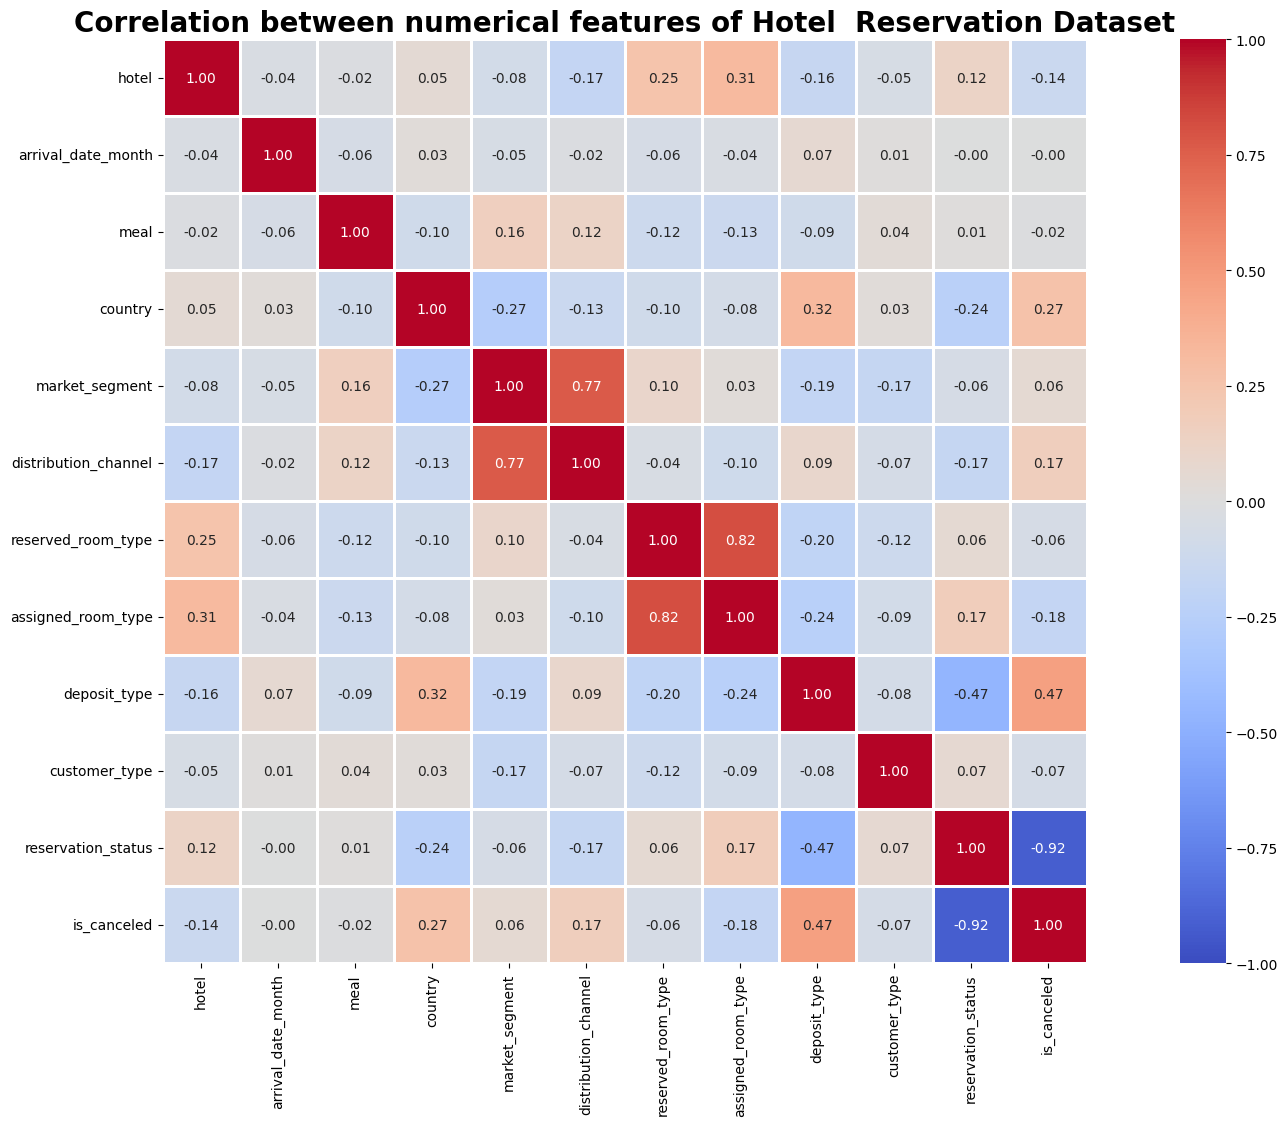

In [72]:
cat_corr = df_cat.corr()

plt.figure(figsize=(24, 12))
sns.heatmap(cat_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", center= 0,
            square=True, linewidths=2)
plt.title('Correlation between numerical features of Hotel  Reservation Dataset', fontsize=20, fontweight='bold')
plt.show()

### 2. Numerical features

In [73]:
selected_columns = [col for col in df.columns if col not in cat_features + ['reservation_status_date']]
df_num = df[selected_columns]

# Display the info of the resulting DataFrame
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119208 entries, 0 to 119389
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119208 non-null  int64  
 1   lead_time                       119208 non-null  int64  
 2   arrival_date_year               119208 non-null  int64  
 3   arrival_date_week_number        119208 non-null  int64  
 4   arrival_date_day_of_month       119208 non-null  int64  
 5   stays_in_weekend_nights         119208 non-null  int64  
 6   stays_in_week_nights            119208 non-null  int64  
 7   adults                          119208 non-null  int64  
 8   children                        119208 non-null  float64
 9   babies                          119208 non-null  int64  
 10  is_repeated_guest               119208 non-null  int64  
 11  previous_cancellations          119208 non-null  int64  
 12  previous_bookings_not

Draw the correlation matrix between numerical features and target

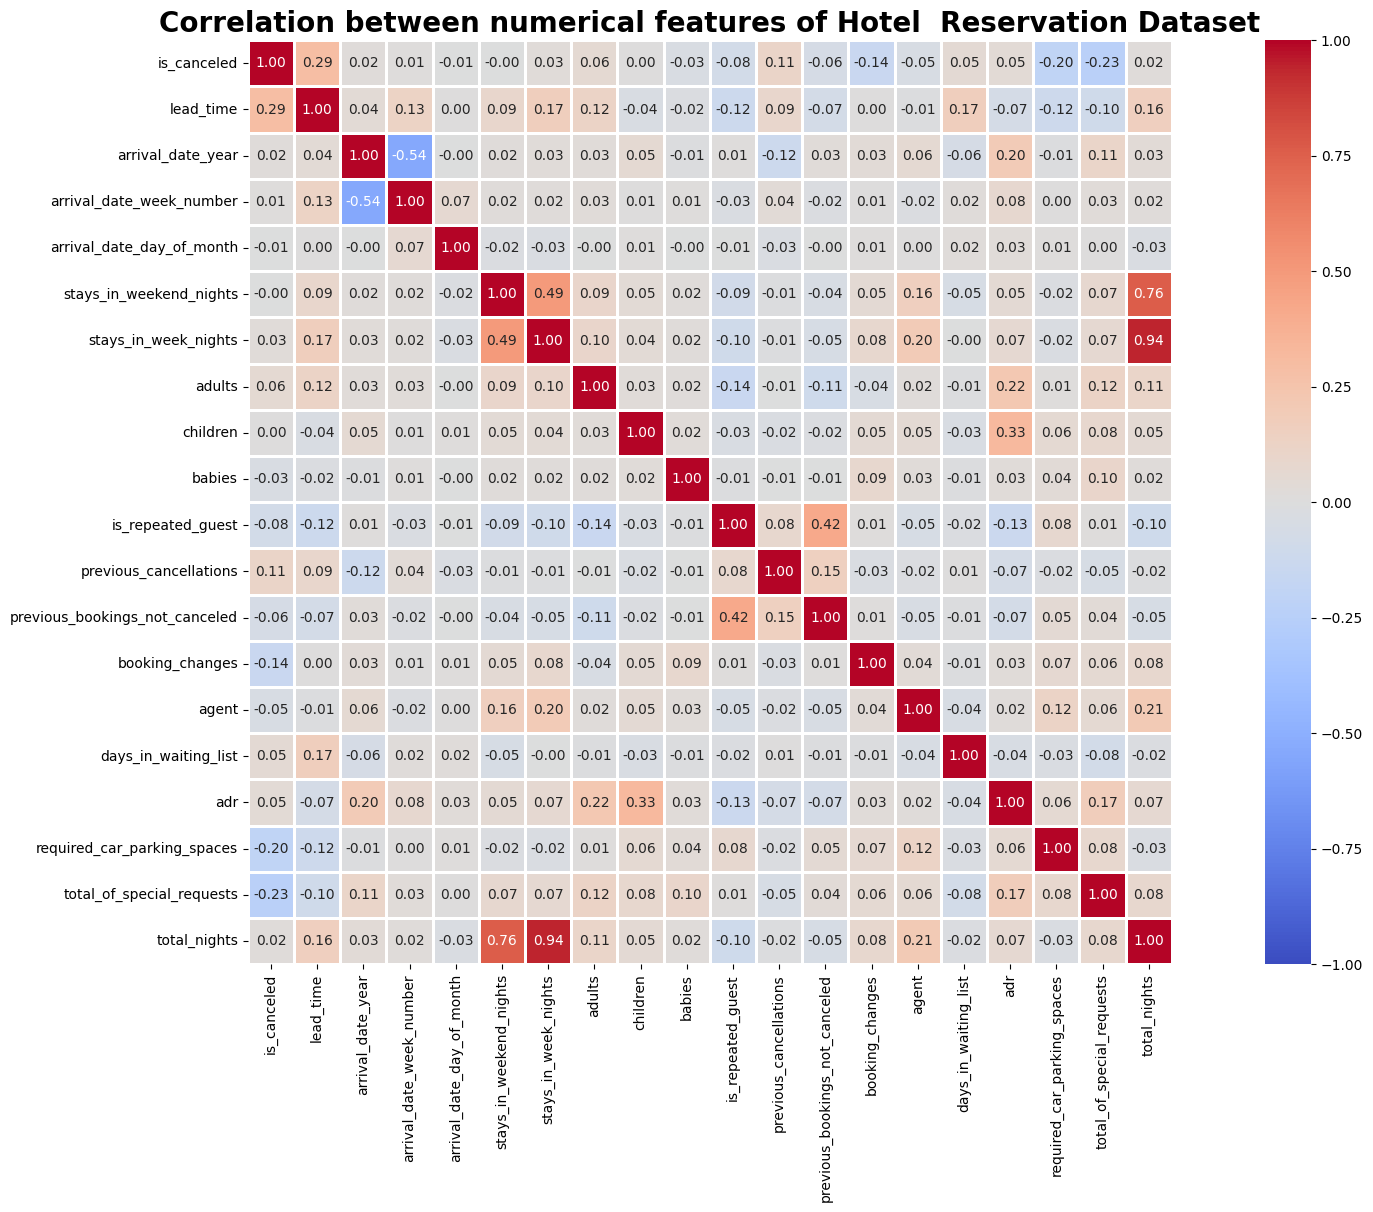

In [74]:
num_corr = df_num.corr()

plt.figure(figsize=(24, 12))
sns.heatmap(num_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", center= 0,
            square=True, linewidths=2)
plt.title('Correlation between numerical features of Hotel  Reservation Dataset', fontsize=20, fontweight='bold')
plt.show()

- When we look at the correlation matrix of the categorical variables, we can see that 'reservation-status' has a very high correlation (0.92) with 'is_canceled'
- We can see that 'reservation-status' can lead to data leakage, so we need to check it again

In [75]:
inverse_encode_cat(df, encoders)

res_status_check_df = df.groupby('is_canceled')['reservation_status'].value_counts()
res_status_check_df


is_canceled  reservation_status
0            Check-Out             75011
1            Canceled              42991
             No-Show                1206
Name: count, dtype: int64

- We can see that when "reservation_status" is "Check-Out", "is_canceled" is 1
- On the contrary, when "reservation_status" is "Canceled", "is_canceled" is 0
- From the above arguments, we can deduce that including the "reservation_status" column will cause data leakage
- We choose to drop the "reservation_status" and "reservation_status_date" columns
- The columns "arrival_date_year", "assigned_room_type", "booking_changes" can also be dropped to increase the overview of the model

In [76]:
df = df.drop(['reservation_status', 'reservation_status_date', 'arrival_date_year', 'assigned_room_type', 'booking_changes'], axis=1)

## Encoding data

In [77]:
cat_features = ["hotel","arrival_date_month","meal","market_segment",
                "distribution_channel","reserved_room_type","deposit_type","customer_type"]

### 1. Feature scaling

In [78]:
sc = MinMaxScaler()
num_features_transform = ["lead_time","adr"]
df[num_features_transform] = sc.fit_transform(df[num_features_transform])
df.head()

hotel  is_canceled  lead_time arrival_date_month  \
0  Resort Hotel            0   0.464043               July   
1  Resort Hotel            0   1.000000               July   
2  Resort Hotel            0   0.009498               July   
3  Resort Hotel            0   0.017639               July   
4  Resort Hotel            0   0.018996               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
0                        0                     0       2       0.0  ...   
1                        0                     0       2       0.0  ...   
2                        0                     1       1       0.0  ...   
3                        0                     1       1       0.0  ...   
4                        0                     2       2       0.0  ...   

   previous_bookings_not_canceled reserved_room_type deposit_type  agent  \
0                               0                  C   No Deposit    0.0   
1                               0                  C   No Deposit    0.0   
2                               0                  A   No Deposit    0.0   
3                               0                  A   No Deposit  304.0   
4                               0                  A   No Deposit  240.0   

  days_in_waiting_list  customer_type       adr  required_car_parking_spaces  \
0                    0      Transient  0.001180                            0   
1                    0      Transient  0.001180                            0   
2                    0      Transient  0.015053                            0   
3                    0      Transient  0.015053                            0   
4                    0      Transient  0.019307                            0   

  total_of_special_requests total_nights  
0                         0            0  
1                         0            0  
2                         0            1  
3                         0            1  
4                         1            2  

[5 rows x 27 columns]

### 2. Feature encoding

First, we print unique value of categorical datas to see which kind of encoding can be applied for each of them

In [79]:
df_cat.drop(columns=['is_canceled'], axis=1, inplace=True)
printUniqueValue(df_cat)

Number of unique values in hotel is 2
Number of unique values in arrival_date_month is 12
Number of unique values in meal is 4
Number of unique values in country is 178
Number of unique values in market_segment is 7
Number of unique values in distribution_channel is 5
Number of unique values in reserved_room_type is 9
Number of unique values in assigned_room_type is 11
Number of unique values in deposit_type is 3
Number of unique values in customer_type is 4
Number of unique values in reservation_status is 3


- We can see that for "country" there are a lot of unique values, therefore we can use BinaryEncoding
- We can use LabelEncoding for columns with 2 unique values like "hotel"
- We can use OneHotEncoder for the rest of the columns

Transform all categorical columns into category data type

In [80]:
for feature in cat_features:
    df[feature] = df[feature].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119208 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   hotel                           119208 non-null  category
 1   is_canceled                     119208 non-null  int64   
 2   lead_time                       119208 non-null  float64 
 3   arrival_date_month              119208 non-null  category
 4   arrival_date_week_number        119208 non-null  int64   
 5   arrival_date_day_of_month       119208 non-null  int64   
 6   stays_in_weekend_nights         119208 non-null  int64   
 7   stays_in_week_nights            119208 non-null  int64   
 8   adults                          119208 non-null  int64   
 9   children                        119208 non-null  float64 
 10  babies                          119208 non-null  int64   
 11  meal                            119208 non-null  category
 12  country

First, we use LabelEncoding

In [81]:
LabelEncoder = LabelEncoder()
df['hotel'] = LabelEncoder.fit_transform(df['hotel'])
df.head()

hotel  is_canceled  lead_time arrival_date_month  arrival_date_week_number  \
0      1            0   0.464043               July                        27   
1      1            0   1.000000               July                        27   
2      1            0   0.009498               July                        27   
3      1            0   0.017639               July                        27   
4      1            0   0.018996               July                        27   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                          1                        0                     0   
1                          1                        0                     0   
2                          1                        0                     1   
3                          1                        0                     1   
4                          1                        0                     2   

   adults  children  ...  previous_bookings_not_canceled reserved_room_type  \
0       2       0.0  ...                               0                  C   
1       2       0.0  ...                               0                  C   
2       1       0.0  ...                               0                  A   
3       1       0.0  ...                               0                  A   
4       2       0.0  ...                               0                  A   

  deposit_type  agent days_in_waiting_list  customer_type       adr  \
0   No Deposit    0.0                    0      Transient  0.001180   
1   No Deposit    0.0                    0      Transient  0.001180   
2   No Deposit    0.0                    0      Transient  0.015053   
3   No Deposit  304.0                    0      Transient  0.015053   
4   No Deposit  240.0                    0      Transient  0.019307   

   required_car_parking_spaces total_of_special_requests total_nights  
0                            0                         0            0  
1                            0                         0            0  
2                            0                         0            1  
3                            0                         0            1  
4                            0                         1            2  

[5 rows x 27 columns]

OnehotEncoding

In [82]:
OneHotFeatures = set(cat_features) - set(['hotel']) - set(['country']) - set(['agent']) - set(['is_repeated_guest'])
oneHotEncoded = pd.get_dummies(df, columns=list(OneHotFeatures), drop_first=True)
oneHotEncoded.head()

hotel  is_canceled  lead_time  arrival_date_week_number  \
0      1            0   0.464043                        27   
1      1            0   1.000000                        27   
2      1            0   0.009498                        27   
3      1            0   0.017639                        27   
4      1            0   0.018996                        27   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                          1                        0                     0   
1                          1                        0                     0   
2                          1                        0                     1   
3                          1                        0                     1   
4                          1                        0                     2   

   adults  children  babies  ... arrival_date_month_May  \
0       2       0.0       0  ...                  False   
1       2       0.0       0  ...                  False   
2       1       0.0       0  ...                  False   
3       1       0.0       0  ...                  False   
4       2       0.0       0  ...                  False   

   arrival_date_month_November  arrival_date_month_October  \
0                        False                       False   
1                        False                       False   
2                        False                       False   
3                        False                       False   
4                        False                       False   

   arrival_date_month_September  market_segment_Complementary  \
0                         False                         False   
1                         False                         False   
2                         False                         False   
3                         False                         False   
4                         False                         False   

   market_segment_Corporate  market_segment_Direct  market_segment_Groups  \
0                     False                   True                  False   
1                     False                   True                  False   
2                     False                   True                  False   
3                      True                  False                  False   
4                     False                  False                  False   

   market_segment_Offline TA/TO  market_segment_Online TA  
0                         False                     False  
1                         False                     False  
2                         False                     False  
3                         False                     False  
4                         False                      True  

[5 rows x 57 columns]

BinaryEncoding

In [83]:
binary_encoder = ce.binary.BinaryEncoder()
binary_encoded_df = binary_encoder.fit_transform(df['country'])
binary_encoded_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 119208 entries, 0 to 119389
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   country_0  119208 non-null  int64
 1   country_1  119208 non-null  int64
 2   country_2  119208 non-null  int64
 3   country_3  119208 non-null  int64
 4   country_4  119208 non-null  int64
 5   country_5  119208 non-null  int64
 6   country_6  119208 non-null  int64
 7   country_7  119208 non-null  int64
dtypes: int64(8)
memory usage: 8.2 MB


In [84]:
binary_encoded_df.shape

(119208, 8)

Merge encoded columns with each other

In [85]:
X = pd.concat([oneHotEncoded, binary_encoded_df], axis=1).drop('country', axis=1)
X.head()

hotel  is_canceled  lead_time  arrival_date_week_number  \
0      1            0   0.464043                        27   
1      1            0   1.000000                        27   
2      1            0   0.009498                        27   
3      1            0   0.017639                        27   
4      1            0   0.018996                        27   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                          1                        0                     0   
1                          1                        0                     0   
2                          1                        0                     1   
3                          1                        0                     1   
4                          1                        0                     2   

   adults  children  babies  ...  market_segment_Offline TA/TO  \
0       2       0.0       0  ...                         False   
1       2       0.0       0  ...                         False   
2       1       0.0       0  ...                         False   
3       1       0.0       0  ...                         False   
4       2       0.0       0  ...                         False   

   market_segment_Online TA  country_0  country_1  country_2  country_3  \
0                     False          0          0          0          0   
1                     False          0          0          0          0   
2                     False          0          0          0          0   
3                     False          0          0          0          0   
4                      True          0          0          0          0   

   country_4  country_5  country_6  country_7  
0          0          0          0          1  
1          0          0          0          1  
2          0          0          1          0  
3          0          0          1          0  
4          0          0          1          0  

[5 rows x 64 columns]

In [86]:
y = X['is_canceled']
X = X.drop('is_canceled', axis=1)

y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_canceled, dtype: int64

In [87]:
print('Shape of features', X.shape)
print('Shape of target', y.shape)

Shape of features (119208, 63)
Shape of target (119208,)


# Build,train and evaluate models

In this section we will be building the following models:
- Logistic Regression
- Decision Tree
- Gaussian Naive Bayes
- Random Forest
- XGBoost Classifier

## 1. Splitting into train set and test set

- The train_test_split function will split the dataset into two part: Train set, test set
- The train set will take 80% of the total portion and the test set will take 20% of the portion. Random_state=42 is included to ensure that continuos value doesn't affect the data. 
- Each set will have features and a target variable accordingly named as "X" and "y"

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Shape of train set', X_train.shape, y_train.shape)
print('Shape of test set', X_test.shape, y_test.shape)

Shape of train set (95366, 63) (95366,)
Shape of test set (23842, 63) (23842,)


In [89]:
acc = dict()
f1 = dict()
recall = dict()
precision = dict()
fpr = dict()
tpr = dict()

## 2. Logistic Regression

#### 2.1. Build and Train model

Create base model and define hyperparamters for tuning for Logistic regression

In [90]:
lg = LogisticRegression()


Tuned Logistic Regression parameters: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [91]:
best_params = {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
LG_best = LogisticRegression(**best_params)
LG_best.fit(X_train, y_train)

acc['Logistic Regression'] = LG_best.score(X_test, y_test)
print(f"Tuned LG model Test set accuracy: {acc['Logistic Regression']}")

Tuned LG model Test set accuracy: 0.8065598523613791


Fit the base model to compare it with the tuned model

In [92]:
lg.fit(X_train, y_train)
print("Base LG model Test set accuracy:", lg.score(X_test, y_test))

Base LG model Test set accuracy: 0.7890277661270028


C:\Users\cawfe\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Confusion Matrix - Logistic Regression

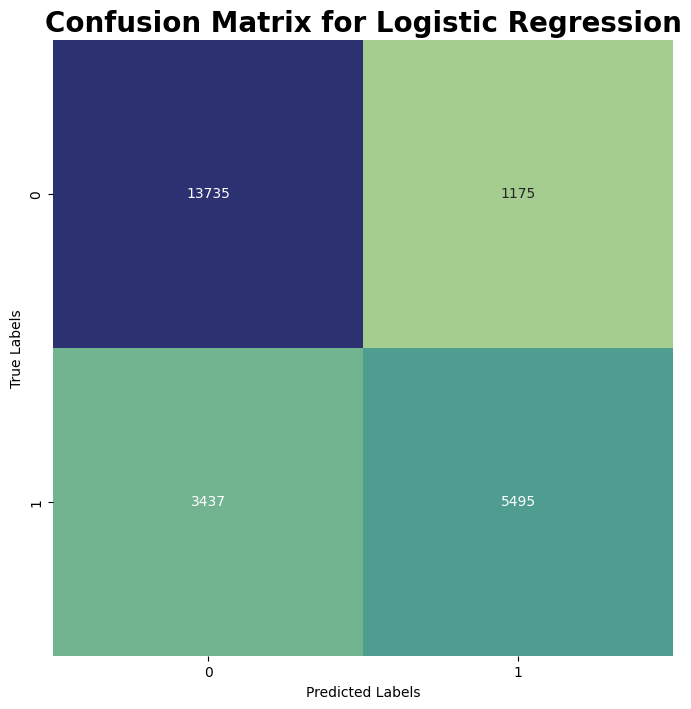

In [93]:
y_lg_pred = LG_best.predict(X_test)
lg_confmat = confusion_matrix(y_test, y_lg_pred)

fig = plt.figure(figsize=(8, 8))
sns.heatmap(lg_confmat, annot=True, cmap='crest', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression', fontsize=20, fontweight='bold')
plt.show()

#### 2.2. Evaluate model

Classification report

In [94]:
print(classification_report(y_test, y_lg_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86     14910
           1       0.82      0.62      0.70      8932

    accuracy                           0.81     23842
   macro avg       0.81      0.77      0.78     23842
weighted avg       0.81      0.81      0.80     23842



Calculate Recall - Precision - F1 Score

In [95]:
# Calculate precision
precision_sc = precision_score(y_test, y_lg_pred)

# Calculate recall
recall_sc = recall_score(y_test, y_lg_pred)

# Calculate F1 score
f1['Logistic Regression'] = f1_score(y_test, y_lg_pred)

# Print the results
print("Precision:", precision_sc)
print("Recall:", recall_sc)
print("F1 Score:", f1['Logistic Regression'])

Precision: 0.8238380809595203
Recall: 0.6152037617554859
F1 Score: 0.7043968721958723


PR curve

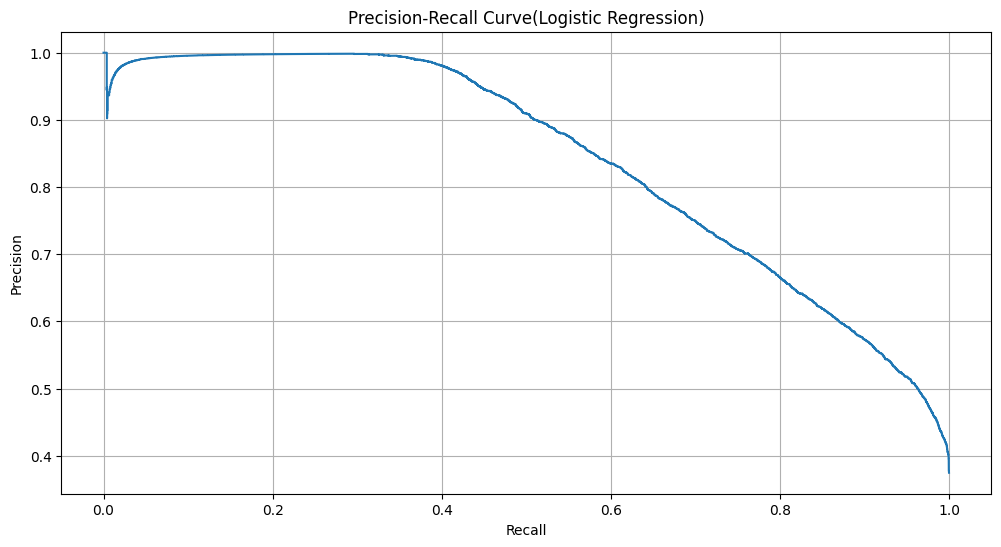

In [96]:
# Calculate precision and recall values
y_lg_pred_prob = LG_best.predict_proba(X_test)[:, 1]
precision['Logistic Regression'], recall['Logistic Regression'], _ = precision_recall_curve(y_test, y_lg_pred_prob)

# Plot the PR curve
plt.figure(figsize=(12, 6))
plt.step(recall["Logistic Regression"], precision["Logistic Regression"], where="post")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve(Logistic Regression)')
plt.grid(True)
plt.show()

Learning Curve

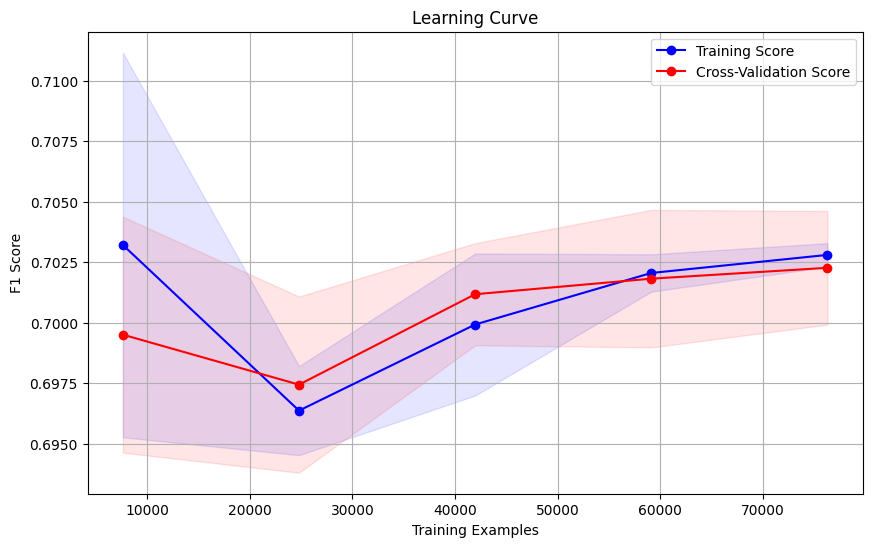

In [97]:

# Define the learning curve function
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, scoring='f1')
    
    # Calculate mean and standard deviation of training scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    
    # Calculate mean and standard deviation of test scores
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.title('Learning Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('F1 Score')
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1, color='b')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.1, color='r')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='b', label='Training Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='r', label='Cross-Validation Score')
    
    plt.legend(loc='best')
    plt.show()

# Plot the learning curve for the logistic regression model
plot_learning_curve(LG_best, X_train, y_train)

ROC curve

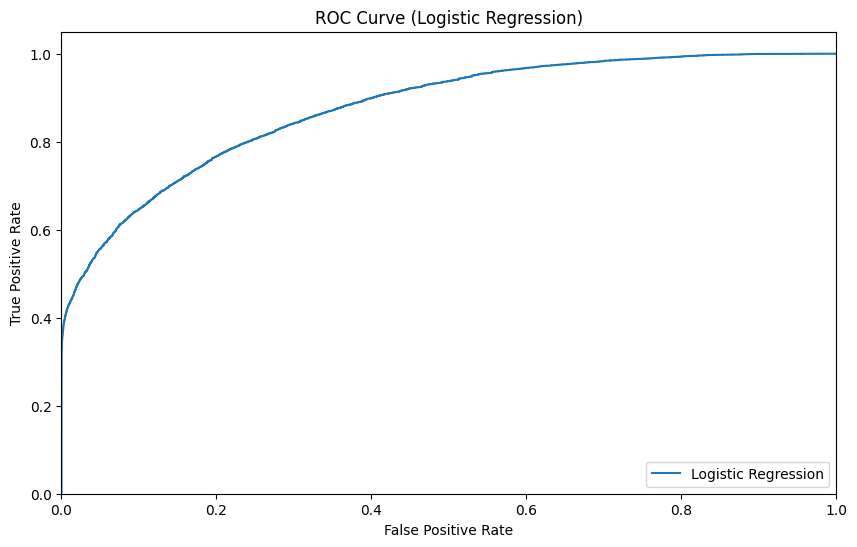

In [100]:
fpr['Logistic Regression'], tpr['Logistic Regression'], thresholds = roc_curve(y_test, y_lg_pred_prob)
roc_auc = auc(fpr['Logistic Regression'], tpr['Logistic Regression'])

# Plotting the ROC curve
plt.figure(figsize=(10, 6))
plt.step(fpr['Logistic Regression'], tpr['Logistic Regression'], where="post", label='Logistic Regression')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Logistic Regression)')
plt.legend(loc="lower right")
plt.show()

## 3. Decision Tree

#### 3.1. Build and Train model

Create base model and define hyperparamters for tuning for Decision Tree

In [101]:
DT = DecisionTreeClassifier()

In [ ]:
# grid_dt = {    
#     'max_depth': [10, 20, 30, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# grid_search_dt = GridSearchCV(estimator=DT, param_grid=grid_dt, n_jobs=-1, scoring='f1', cv=5)
# grid_search_dt.fit(X_train, y_train)

# best_params = grid_search_dt.best_params_
# print('Tuned Decision Tree parameters:', best_params)

Tuned Decision Tree parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [102]:
best_params = {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
DT_best = DecisionTreeClassifier(**best_params)
DT_best.fit(X_train, y_train)

acc['Decision Tree'] = DT_best.score(X_test, y_test)
print(f"Tuned DT model Test set accuracy: {acc['Decision Tree']}")

Tuned DT model Test set accuracy: 0.8567653720325477


Fit the base model to compare it with the tuned model

In [103]:
DT.fit(X_train, y_train)
print("Base DT model Test set accuracy:", DT.score(X_test, y_test))

Base DT model Test set accuracy: 0.8533260632497274


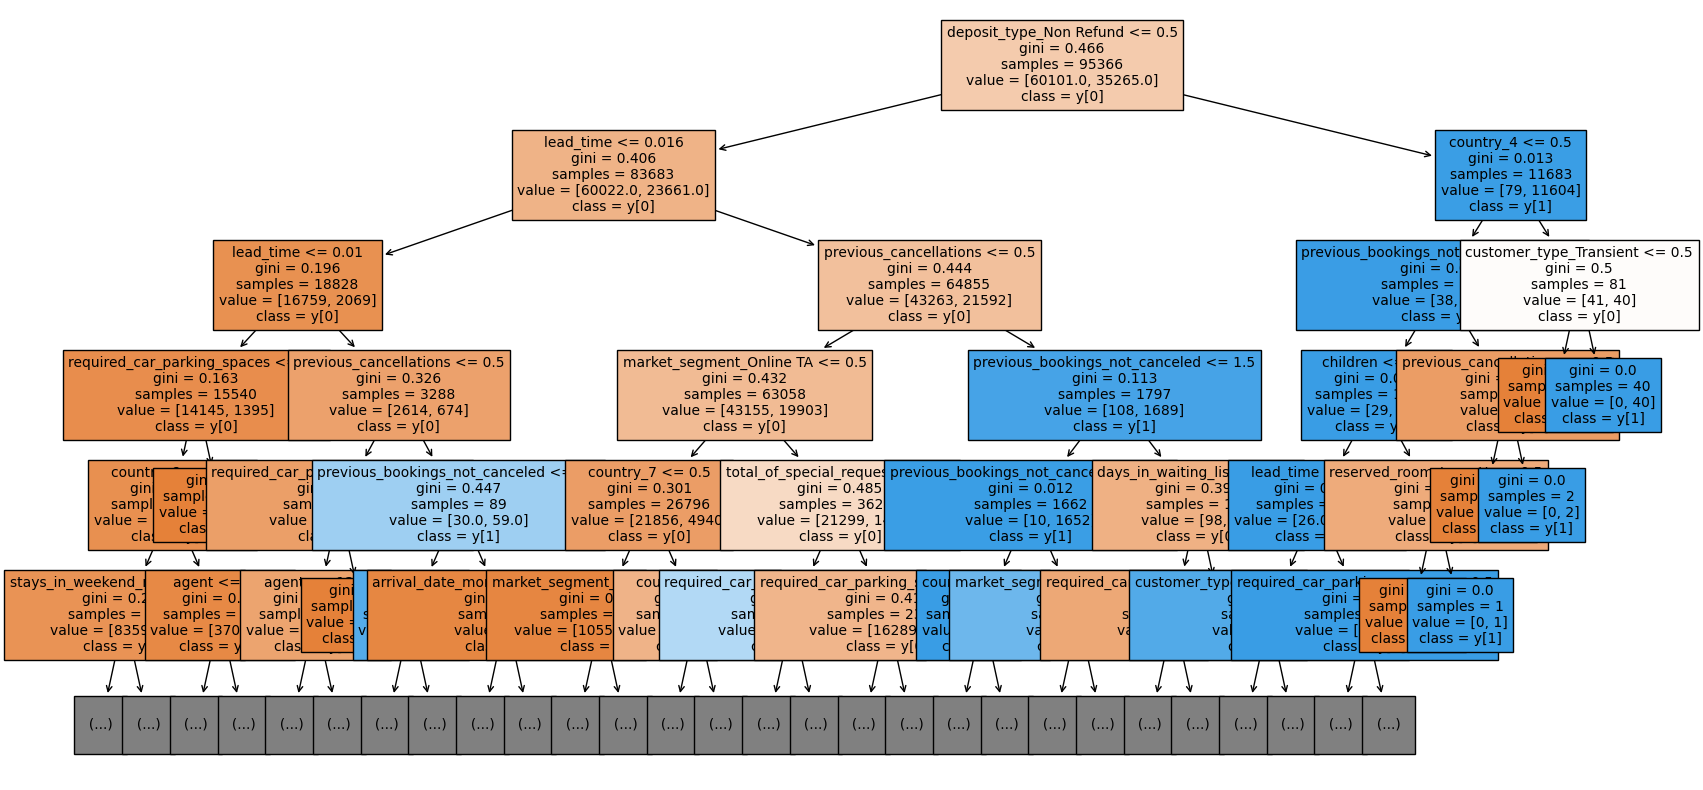

In [104]:
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(DT_best, max_depth=5, fontsize=10, feature_names=X_train.columns.to_list(), class_names = True, filled=True)
plt.show()

Confusion Matrix - Decision Tree

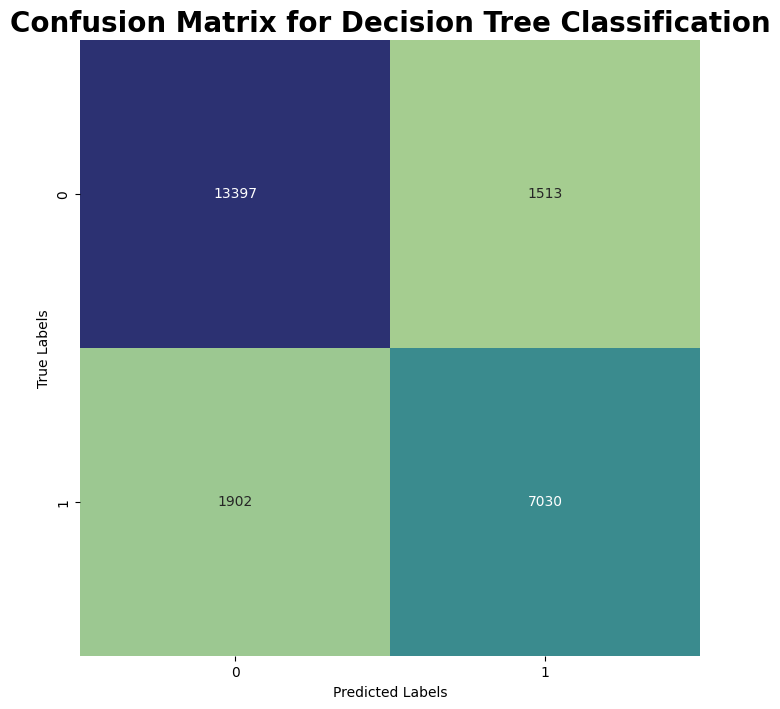

In [105]:
y_DT_pred = DT_best.predict(X_test)
dt_confmat = confusion_matrix(y_test, y_DT_pred)

fig = plt.figure(figsize=(8, 8))
sns.heatmap(dt_confmat, annot=True, cmap='crest', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Decision Tree Classification', fontsize=20, fontweight='bold')
plt.show()

#### 3.2. Evaluate model

Classification report

In [106]:
print(classification_report(y_test, y_DT_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     14910
           1       0.82      0.79      0.80      8932

    accuracy                           0.86     23842
   macro avg       0.85      0.84      0.85     23842
weighted avg       0.86      0.86      0.86     23842



Calculate Recall - Precision - F1 Score

In [107]:
# Calculate precision
precision_sc = precision_score(y_test, y_DT_pred)

# Calculate recall
recall_sc = recall_score(y_test, y_DT_pred)

# Calculate F1 score
f1['Decision Tree'] = f1_score(y_test, y_DT_pred)

# Print the results
print("Precision:", precision_sc)
print("Recall:", recall_sc)
print("F1 Score:", f1['Decision Tree'])

Precision: 0.8228959381950135
Recall: 0.7870577698163905
F1 Score: 0.8045779685264663


PR curve

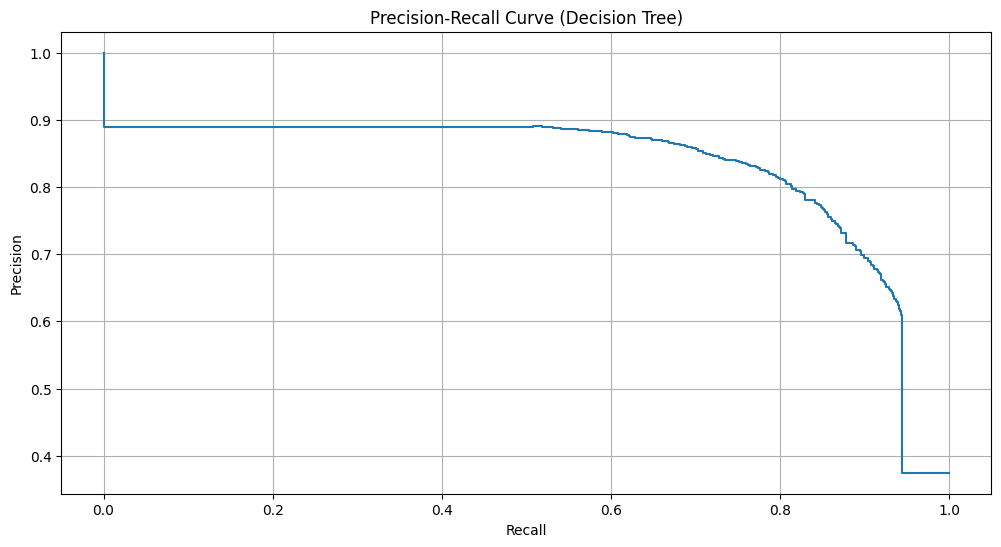

In [108]:
y_dt_pred_prob = DT_best.predict_proba(X_test)[:, 1]
# Calculate precision and recall values
precision['Decision Tree'], recall['Decision Tree'], _ = precision_recall_curve(y_test, y_dt_pred_prob)

# Plot the PR curve
plt.figure(figsize=(12, 6))
plt.step(recall["Decision Tree"], precision["Decision Tree"], where="post")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Decision Tree)')
plt.grid(True)
plt.show()

Learning Curve

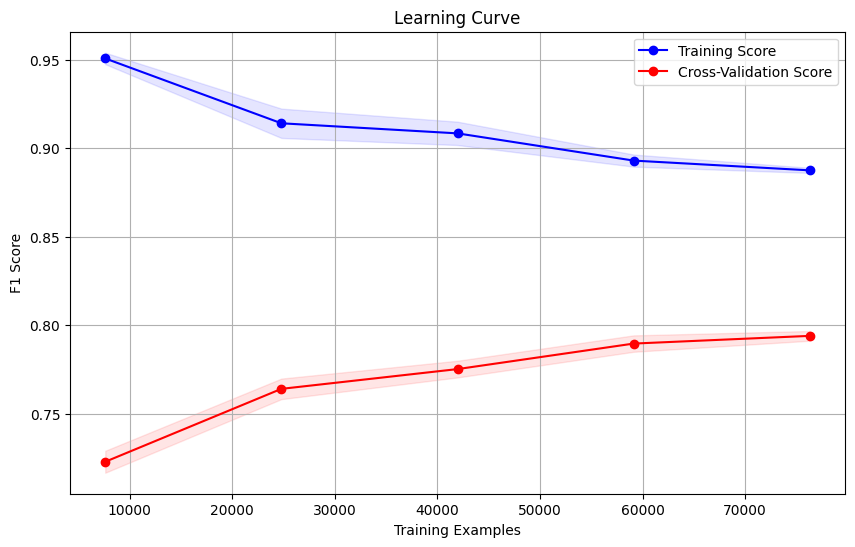

In [ ]:
plot_learning_curve(DT_best, X_train, y_train)

ROC curve

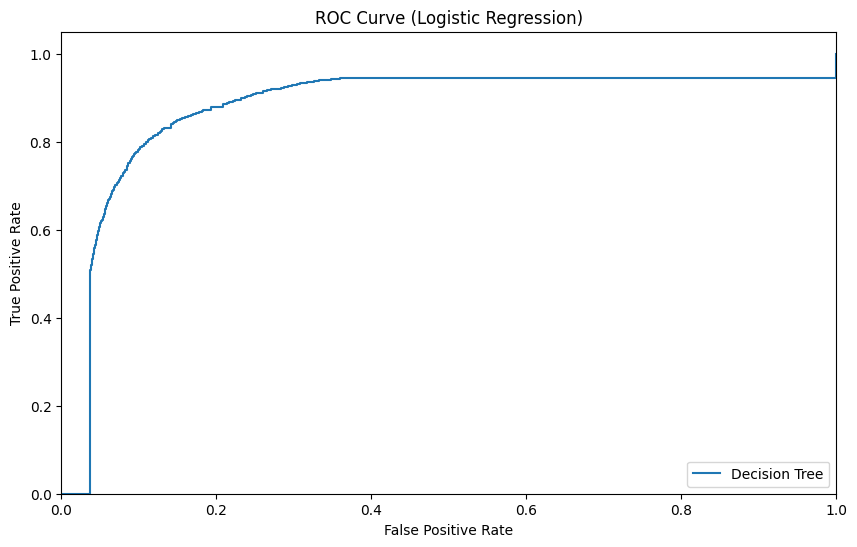

In [110]:
fpr['Decision Tree'], tpr['Decision Tree'], thresholds = roc_curve(y_test, y_dt_pred_prob)
roc_auc = auc(fpr['Decision Tree'], tpr['Decision Tree'])

# Plotting the ROC curve
plt.figure(figsize=(10, 6))
plt.step(fpr['Decision Tree'], tpr['Decision Tree'], where="post", label='Decision Tree')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Logistic Regression)')
plt.legend(loc="lower right")
plt.show()

## 4. Gaussian Naive Bayes

Create base model and define hyperparamters for tuning for Support Vector Machine

In [111]:
gnb = GaussianNB()


In [112]:
params_GNB = {
    'var_smoothing': np.logspace(0,-9, num=100)
    } 
grid_search_GNB = RandomizedSearchCV(estimator=gnb, param_distributions=params_GNB, scoring='f1', n_jobs=-1, cv=5)
grid_search_GNB.fit(X_train, y_train)
best_params = grid_search_GNB.best_params_
print('Tuned GNB parameters:', best_params)

Tuned GNB parameters: {'var_smoothing': 1.5199110829529332e-05}


In [113]:
best_params = {'var_smoothing': 3.5111917342151275e-06}
gnb_best = GaussianNB(**best_params)
gnb_best.fit(X_train, y_train)

acc['Gaussian Naive Bayes'] = gnb_best.score(X_test, y_test)
print(f"Tuned GNB model Test set accuracy: {acc['Gaussian Naive Bayes']}")

Tuned GNB model Test set accuracy: 0.7327405419008473


Fit the base model to compare it with the tuned model

In [114]:
gnb.fit(X_train, y_train)
print("Base GNB model Test set accuracy:", gnb.score(X_test, y_test))

Base GNB model Test set accuracy: 0.579271873165003


Confusion Matrix - Gaussian Naive Bayes

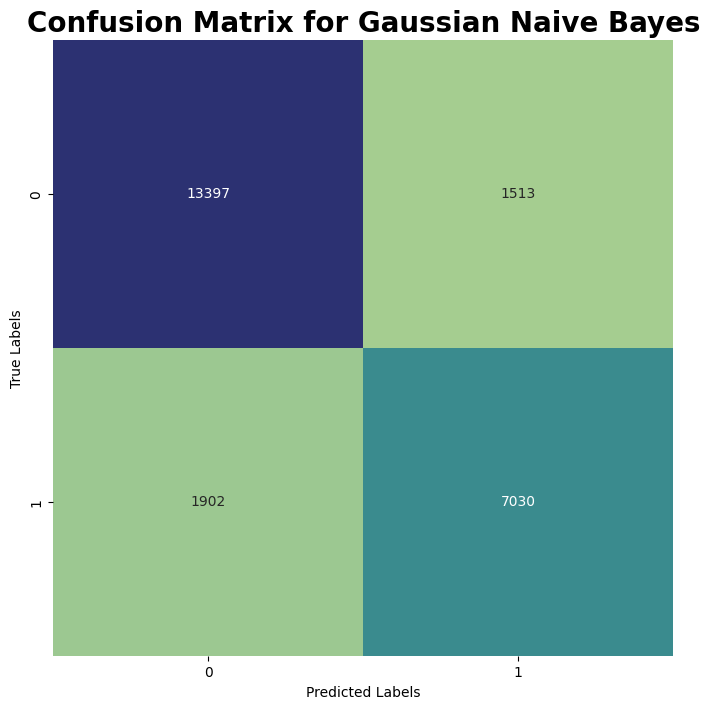

In [115]:
y_GNB_pred = gnb_best.predict(X_test)
gnb_confmat = confusion_matrix(y_test, y_DT_pred)

fig = plt.figure(figsize=(8, 8))
sns.heatmap(gnb_confmat, annot=True, cmap='crest', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Gaussian Naive Bayes', fontsize=20, fontweight='bold')
plt.show()

### 4.2. Evaluate model

Classification report

In [116]:
print(classification_report(y_test, y_GNB_pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78     14910
           1       0.64      0.67      0.65      8932

    accuracy                           0.73     23842
   macro avg       0.72      0.72      0.72     23842
weighted avg       0.74      0.73      0.73     23842



Calculate Recall - Precision - F1 Score

In [117]:
# Calculate precision
precision_sc = precision_score(y_test, y_GNB_pred)

# Calculate recall
recall_sc = recall_score(y_test, y_GNB_pred)

# Calculate F1 score
f1['Gaussian Naive Bayes'] = f1_score(y_test, y_GNB_pred)

# Print the results
print("Precision:", precision_sc)
print("Recall:", recall_sc)
print("F1 Score:", f1['Gaussian Naive Bayes'])

Precision: 0.6360833510525197
Recall: 0.6698387819077474
F1 Score: 0.6525248118660705


PR Curve

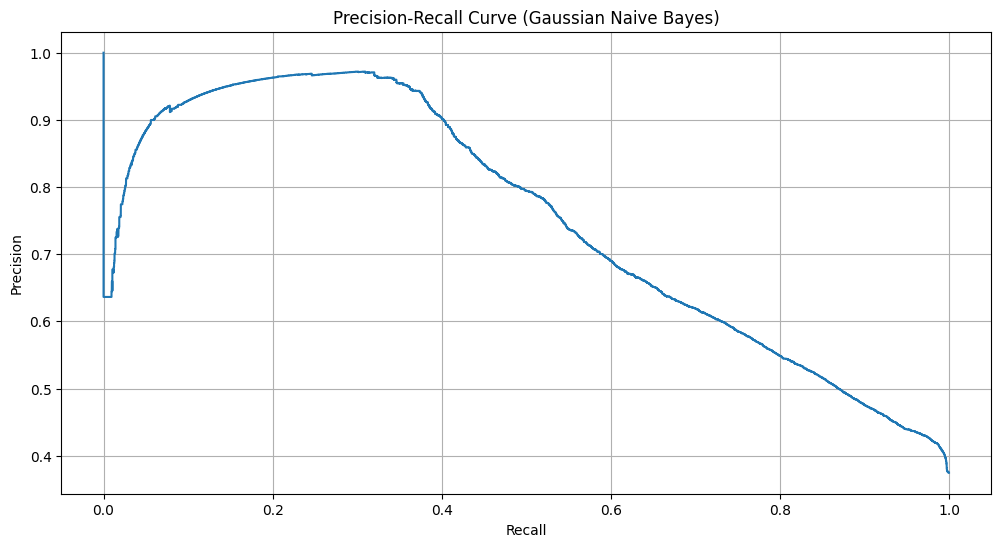

In [118]:
y_gnb_pred_prob = gnb_best.predict_proba(X_test)[:, 1]
# Calculate precision and recall values
precision['Gaussian Naive Bayes'], recall['Gaussian Naive Bayes'], _ = precision_recall_curve(y_test, y_gnb_pred_prob)

# Plot the PR curve
plt.figure(figsize=(12, 6))
plt.step(recall["Gaussian Naive Bayes"], precision["Gaussian Naive Bayes"], where="post")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Gaussian Naive Bayes)')
plt.grid(True)
plt.show()

Learning Curve

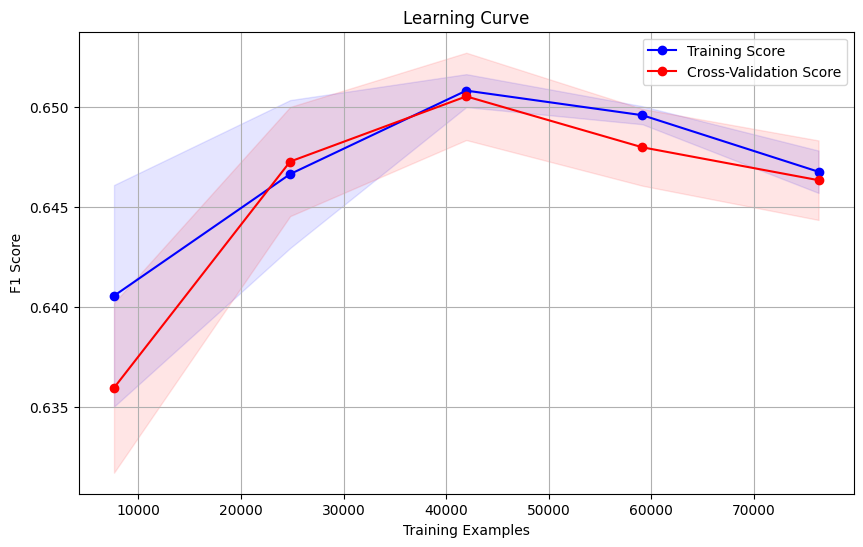

In [ ]:
plot_learning_curve(gnb_best, X_train, y_train)

ROC Curve

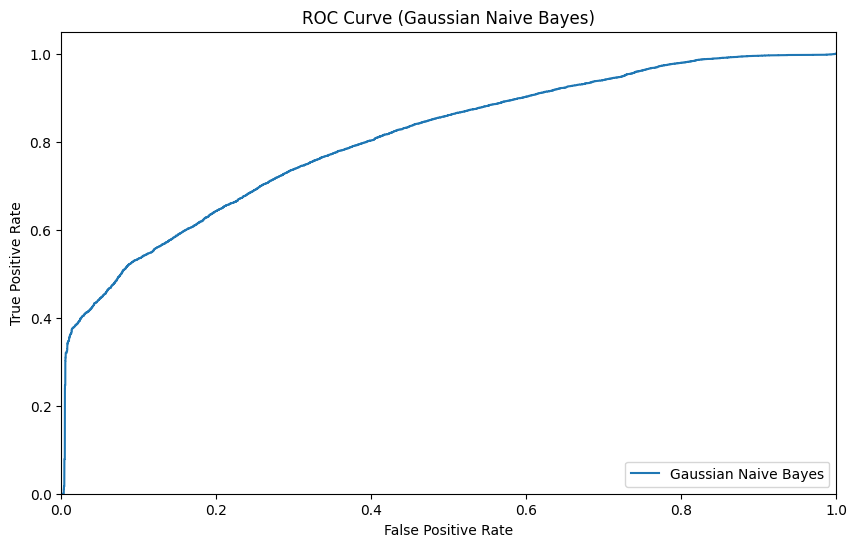

In [120]:
fpr['Gaussian Naive Bayes'], tpr['Gaussian Naive Bayes'], thresholds = roc_curve(y_test, y_gnb_pred_prob)
roc_auc = auc(fpr['Gaussian Naive Bayes'], tpr['Gaussian Naive Bayes'])

# Plotting the ROC curve
plt.figure(figsize=(10, 6))
plt.step(fpr['Gaussian Naive Bayes'], tpr['Gaussian Naive Bayes'], where="post", label='Gaussian Naive Bayes')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Gaussian Naive Bayes)')
plt.legend(loc="lower right")
plt.show()

## 5. Random Forest

### 5.1. Build and train model

Create base model and define hyperparamters for tuning for Random Forest

In [121]:
rfc = RandomForestClassifier()

In [ ]:
# parameters_rfc = {
# 'n_estimators' : [100,200,500],
# 'min_samples_split' : [2,4,6,8],
# 'min_samples_leaf': [1,2,4,6]
# }

# grid_search_rfc = GridSearchCV(estimator=rfc, param_grid=parameters_rfc,
#                         cv=5, scoring='f1', n_jobs=-1)
# grid_search_rfc.fit(X_train, y_train)
# best_params = grid_search_rfc.best_params_
# print('Tuned RFC parameters:', best_params)

Tuned RFC parameters: {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}

In [122]:
best_params = {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
rfc_best = RandomForestClassifier(**best_params)
rfc_best.fit(X_train, y_train)

acc['Random Forest'] = rfc_best.score(X_test, y_test)
print(f"Tuned RFC model Test set accuracy: {acc['Random Forest']}")

Tuned RFC model Test set accuracy: 0.8899001761597182


Fit the base model to compare it with the tuned model

In [123]:
rfc.fit(X_train, y_train)
print("Base SVC model Test set accuracy:", rfc.score(X_test, y_test))

Base SVC model Test set accuracy: 0.8882644073483769


Confusion Matrix - Random Forest

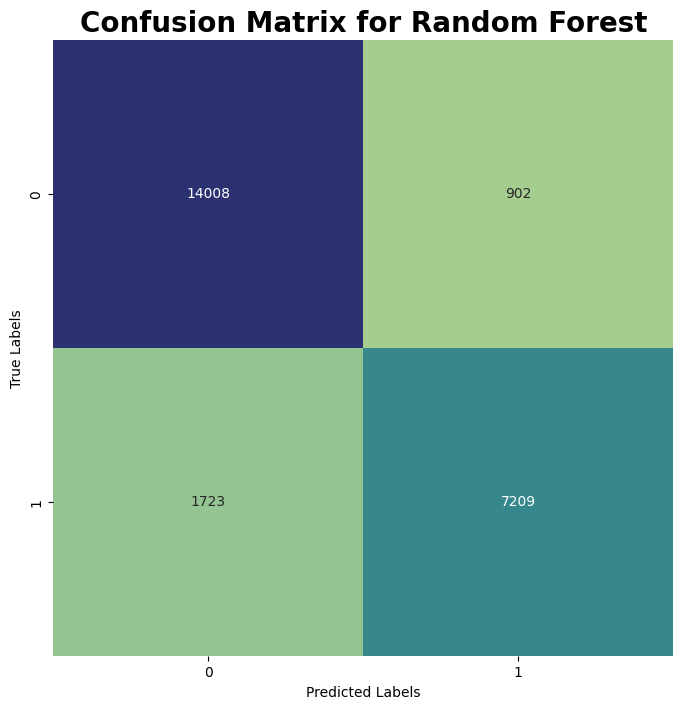

In [124]:
y_rfc_pred = rfc_best.predict(X_test)
rfc_confmat = confusion_matrix(y_test, y_rfc_pred)

fig = plt.figure(figsize=(8, 8))
sns.heatmap(rfc_confmat, annot=True, cmap='crest', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest', fontsize=20, fontweight='bold')
plt.show()

### 5.2. Evaluate model

Classification report

In [125]:
print(classification_report(y_test, y_rfc_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91     14910
           1       0.89      0.81      0.85      8932

    accuracy                           0.89     23842
   macro avg       0.89      0.87      0.88     23842
weighted avg       0.89      0.89      0.89     23842



Calculate Recall - Precision - F1 Score

In [126]:
# Calculate precision
precision_sc = precision_score(y_test, y_rfc_pred)

# Calculate recall
recall_sc = recall_score(y_test, y_rfc_pred)

# Calculate F1 score
f1['Random Forest'] = f1_score(y_test, y_rfc_pred)

# Print the results
print("Precision:", precision_sc)
print("Recall:", recall_sc)
print("F1 Score:", f1['Random Forest'])

Precision: 0.8887929971643447
Recall: 0.8070980743394537
F1 Score: 0.8459778208061961


PR curve

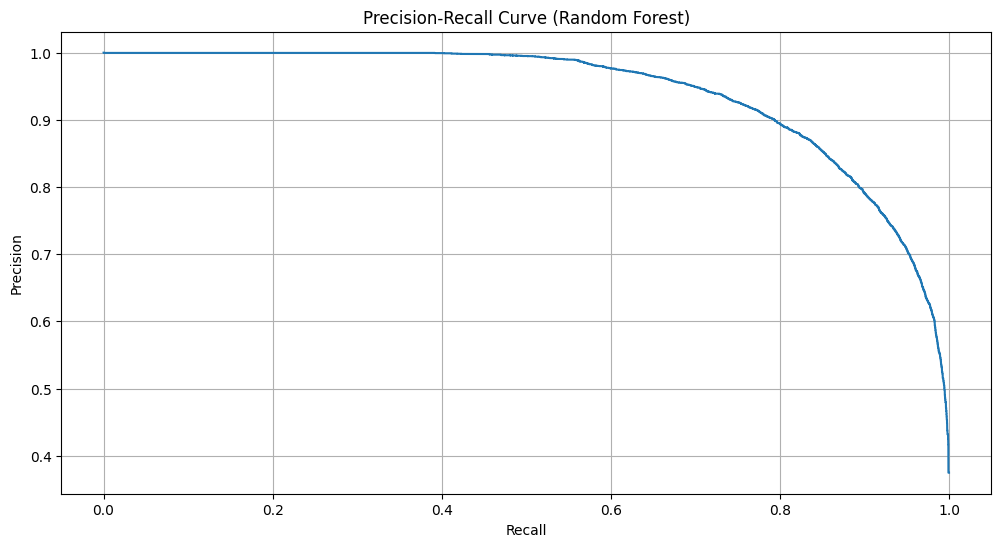

In [127]:
y_rfc_pred_prob = rfc_best.predict_proba(X_test)[:, 1]
# Calculate precision and recall values
precision['Random Forest'], recall['Random Forest'], _ = precision_recall_curve(y_test, y_rfc_pred_prob)

# Plot the PR curve
plt.figure(figsize=(12, 6))
plt.step(recall["Random Forest"], precision["Random Forest"], where="post")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Random Forest)')
plt.grid(True)
plt.show()

Learning Curve

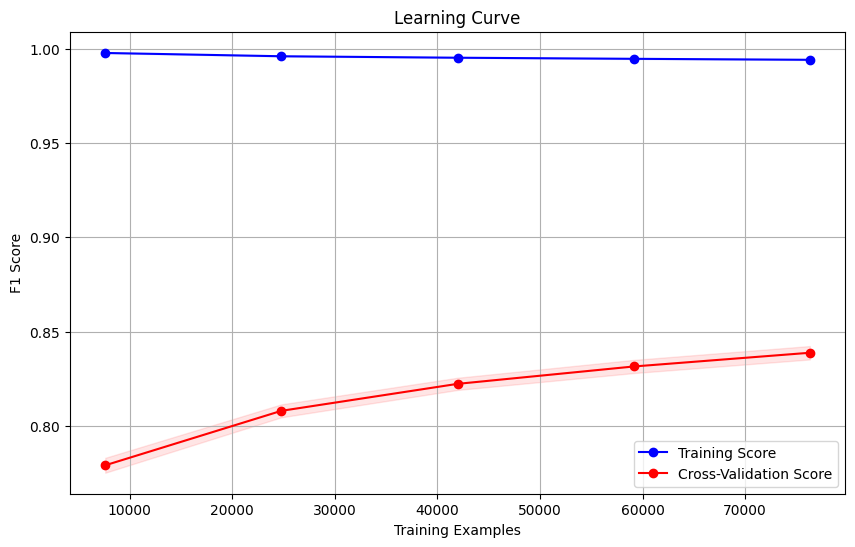

In [ ]:
plot_learning_curve(rfc_best, X_train, y_train)

ROC Curve

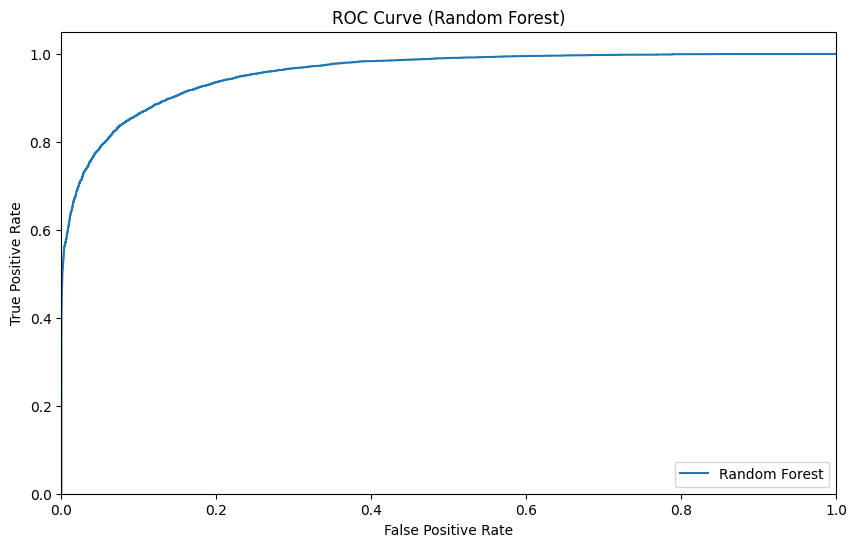

In [129]:
fpr['Random Forest'], tpr['Random Forest'], thresholds = roc_curve(y_test, y_rfc_pred_prob)
roc_auc = auc(fpr['Random Forest'], tpr['Random Forest'])

# Plotting the ROC curve
plt.figure(figsize=(10, 6))
plt.step(fpr['Random Forest'], tpr['Random Forest'], where="post", label='Random Forest')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest)')
plt.legend(loc="lower right")
plt.show()

## 6. XGBoost Classifier

### 6.1. Build and train model

In [130]:
xgbc = XGBClassifier()

In [ ]:
# xgbc = XGBClassifier()
# parameters = {
# 'n_estimators' : [100,250,500],
# 'learning_rate' : [0.01, 0.1],
# 'subsample' :[0.5, 1.0],
# 'max_depth' : [3,5,7],
# 'criterion' : ['giny','entropy'],
# 'objective':['binary:logistic'],
# }
# grid_serach_xgbc = GridSearchCV(estimator=xgbc, param_grid=parameters, cv=5, scoring='f1', n_jobs=-1)
# grid_serach_xgbc.fit(X_train, y_train)
# best_params = grid_serach_xgbc.best_params_
# print('Tuned XGBC parameters:', best_params)

Tuned XGBC parameters: {'criterion': 'giny', 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500, 'objective': 'binary:logistic', 'subsample': 1.0}

In [131]:
best_params = {'criterion': 'giny', 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500, 'objective': 'binary:logistic', 'subsample': 1.0}
xgbc_best = XGBClassifier(**best_params)
xgbc_best.fit(X_train, y_train)

acc['XGBoost Classifier'] = xgbc_best.score(X_test, y_test)
print(f"Tuned XGBC model Test set accuracy: {acc['XGBoost Classifier']}")

C:\Users\cawfe\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:160: UserWarning:

[21:12:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.




Tuned XGBC model Test set accuracy: 0.8817632748930458


Fit the base model to compare it with the tuned model

In [132]:
xgbc.fit(X_train, y_train)
print("Base XGBC model Test set accuracy:", xgbc.score(X_test, y_test))

Base XGBC model Test set accuracy: 0.8722842043452731


Confusion Matrix - XGBoost Classification

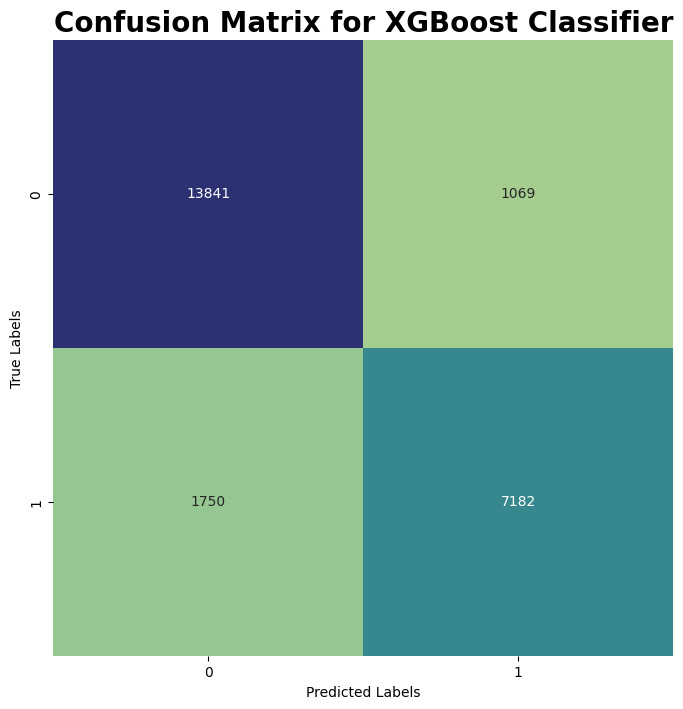

In [133]:
y_xgbc_pred = xgbc_best.predict(X_test)
xgbc_confmat = confusion_matrix(y_test, y_xgbc_pred)

fig = plt.figure(figsize=(8, 8))
sns.heatmap(xgbc_confmat, annot=True, cmap='crest', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for XGBoost Classifier', fontsize=20, fontweight='bold')
plt.show()

Finding Feature importance for XGBClassifier

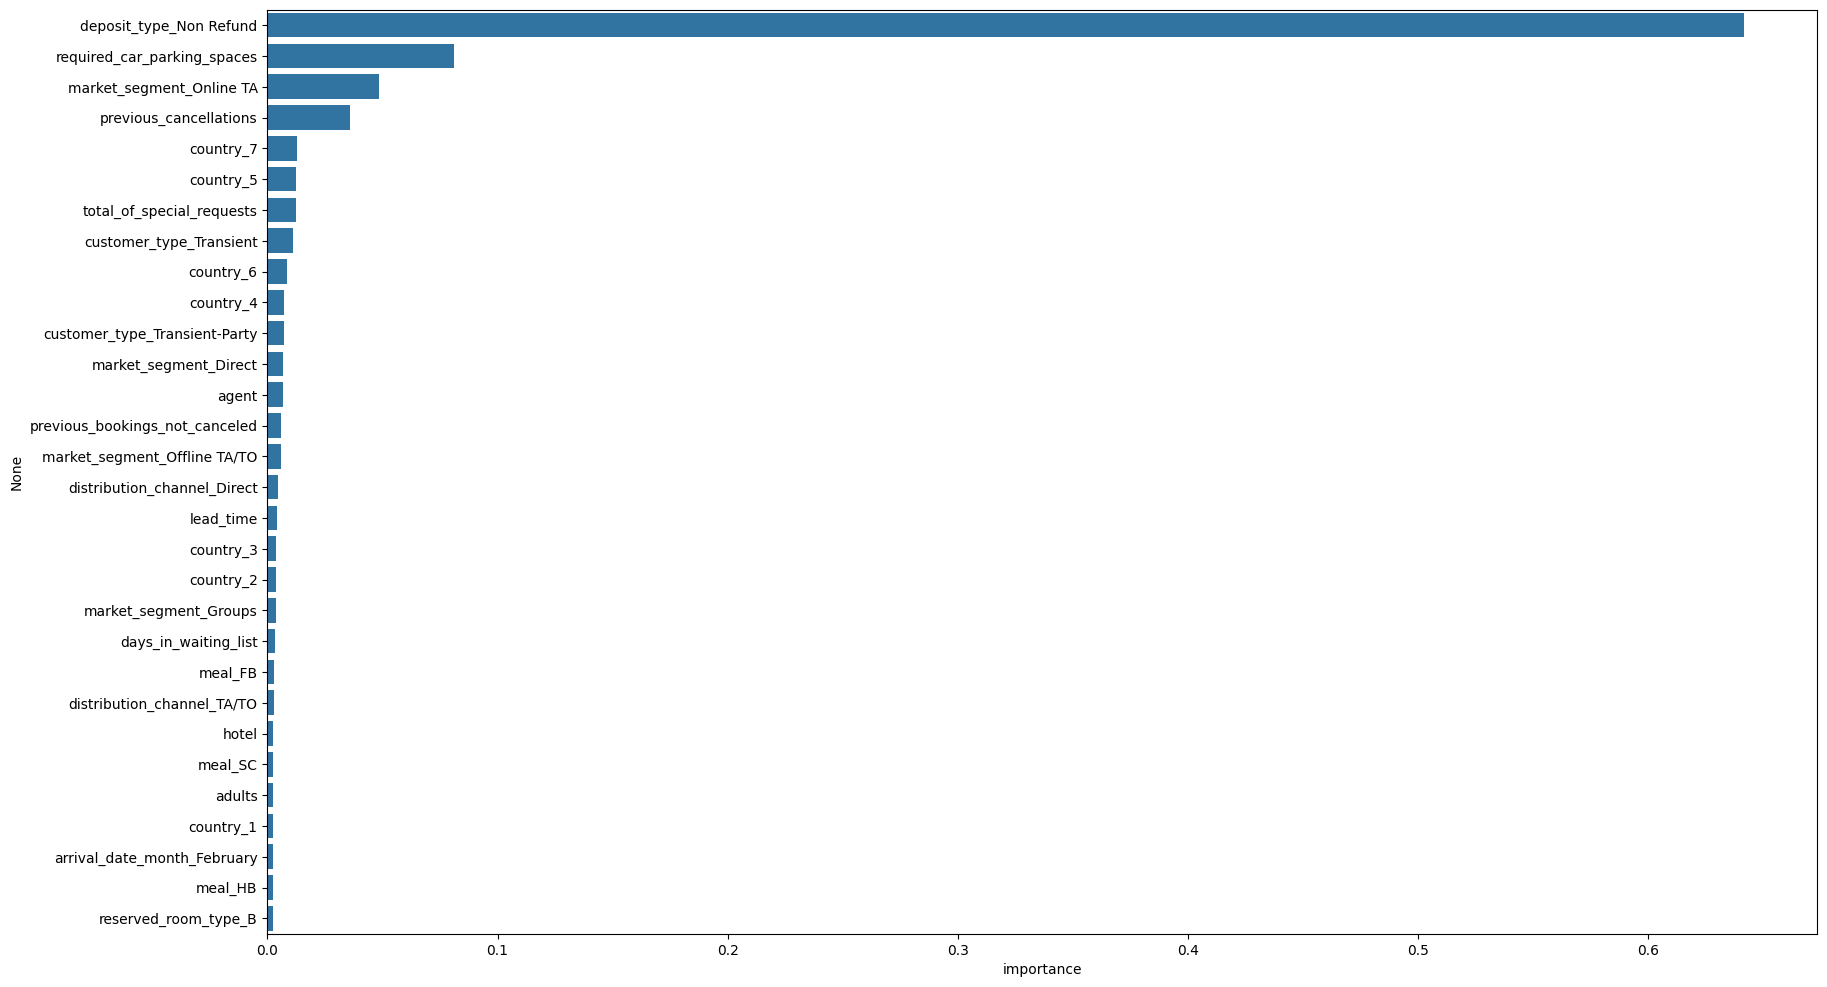

In [134]:
fi_df = pd.DataFrame(np.zeros((X_train.shape[1], 1)), columns=['importance'], index=X_train.columns)
fi_df.iloc[:, 0] = xgbc_best.feature_importances_
fi_df = fi_df.sort_values(by="importance", ascending=False)[:30]

plt.figure(figsize=(20, 12))
sns.barplot(x="importance", y=fi_df.index, data=fi_df)
plt.show()

### 6.2. Evaluate model

Classification report

In [135]:
print(classification_report(y_test, y_xgbc_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     14910
           1       0.87      0.80      0.84      8932

    accuracy                           0.88     23842
   macro avg       0.88      0.87      0.87     23842
weighted avg       0.88      0.88      0.88     23842



Calculate Recall - Precision - F1 Score

In [136]:
# Calculate precision
precision_sc = precision_score(y_test, y_xgbc_pred)

# Calculate recall
recall_sc = recall_score(y_test, y_xgbc_pred)

# Calculate F1 score
f1['XGBoost Classifier'] = f1_score(y_test, y_xgbc_pred)

# Print the results
print("Precision:", precision_sc)
print("Recall:", recall_sc)
print("F1 Score:", f1['XGBoost Classifier'])

Precision: 0.8704399466731305
Recall: 0.8040752351097179
F1 Score: 0.8359425013094337


PR curve

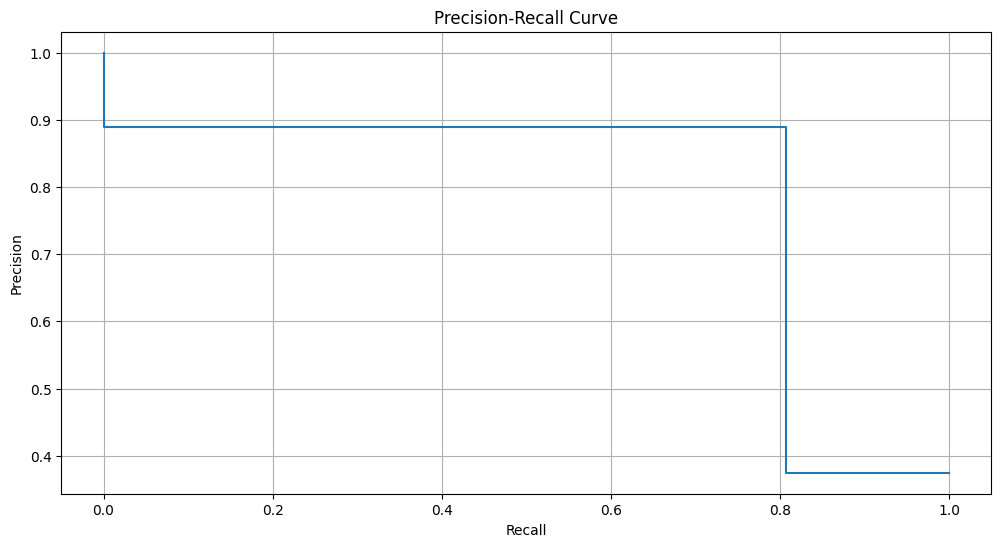

In [137]:
y_xgbc_pred_prob = xgbc_best.predict_proba(X_test)[:, 1]
precision['XGBoost Classifier'], recall['XGBoost Classifier'], _ = precision_recall_curve(y_test, y_rfc_pred)

# Plot the PR curve
plt.figure(figsize=(12, 6))
plt.step(recall["XGBoost Classifier"], precision["XGBoost Classifier"], where="post")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

Learning Curve

C:\Users\cawfe\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:160: UserWarning:

[18:33:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.


C:\Users\cawfe\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:160: UserWarning:

[18:33:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.


C:\Users\cawfe\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:160: UserWarning:

[18:33:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.


C:\Users\cawfe\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:160: UserWarning:

[18:33:49] W

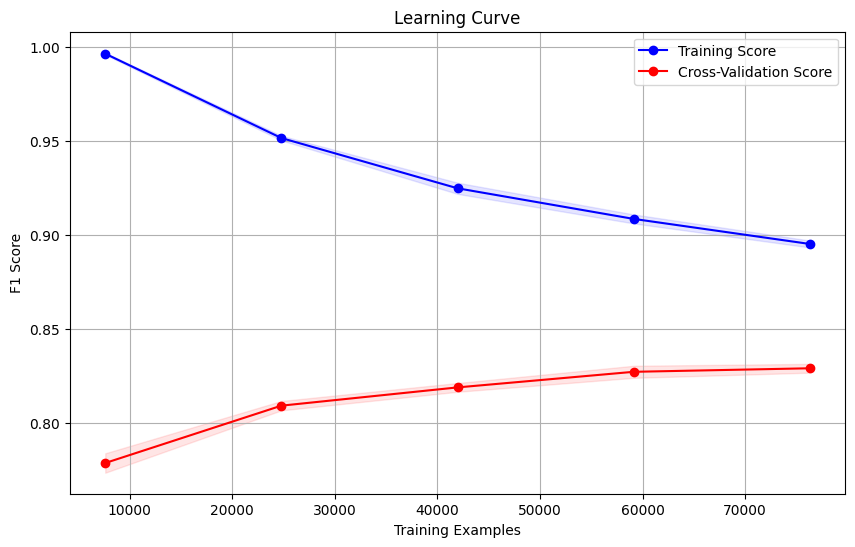

In [ ]:
plot_learning_curve(xgbc_best, X_train, y_train)

ROC curve

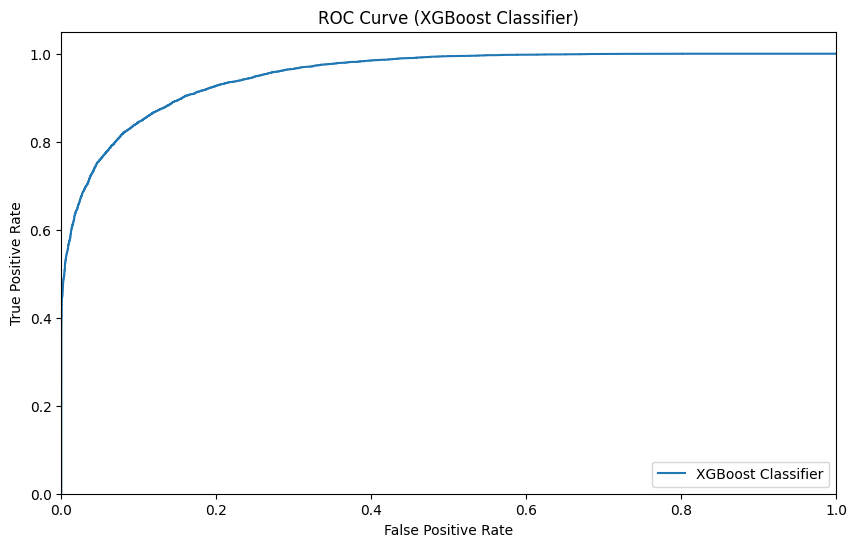

In [138]:
fpr['XGBoost Classifier'], tpr['XGBoost Classifier'], thresholds = roc_curve(y_test, y_xgbc_pred_prob)
roc_auc = auc(fpr['XGBoost Classifier'], tpr['XGBoost Classifier'])

# Plotting the ROC curve
plt.figure(figsize=(10, 6))
plt.step(fpr['XGBoost Classifier'], tpr['XGBoost Classifier'], where="post", label='XGBoost Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (XGBoost Classifier)')
plt.legend(loc="lower right")
plt.show()

# Compare models

### 1. Accuracy score of all models

In [ ]:
acc_df = pd.DataFrame(list(acc.items()), columns=['Model', 'Test Score'])

# Create the bar chart
fig = px.bar(acc_df, x='Model', y='Test Score', 
            color='Test Score', template='plotly_dark', 
            title='Test Score of Different Classification Model')

# Update y-axis range from 0 to 1
fig.update_yaxes(range=[0, 1])

fig.show()

### 2. F1 scores of all models

In [139]:
f1_df = pd.DataFrame(list(acc.items()), columns=['Model', 'F1 Score'])


fig = px.bar(f1_df, x='Model', y='F1 Score', 
            color='F1 Score', template='plotly_dark', title='F1 score of Different Classification Model'
            )
fig.update_yaxes(range=[0, 1])
fig.show()

### 3. PR curves of different models

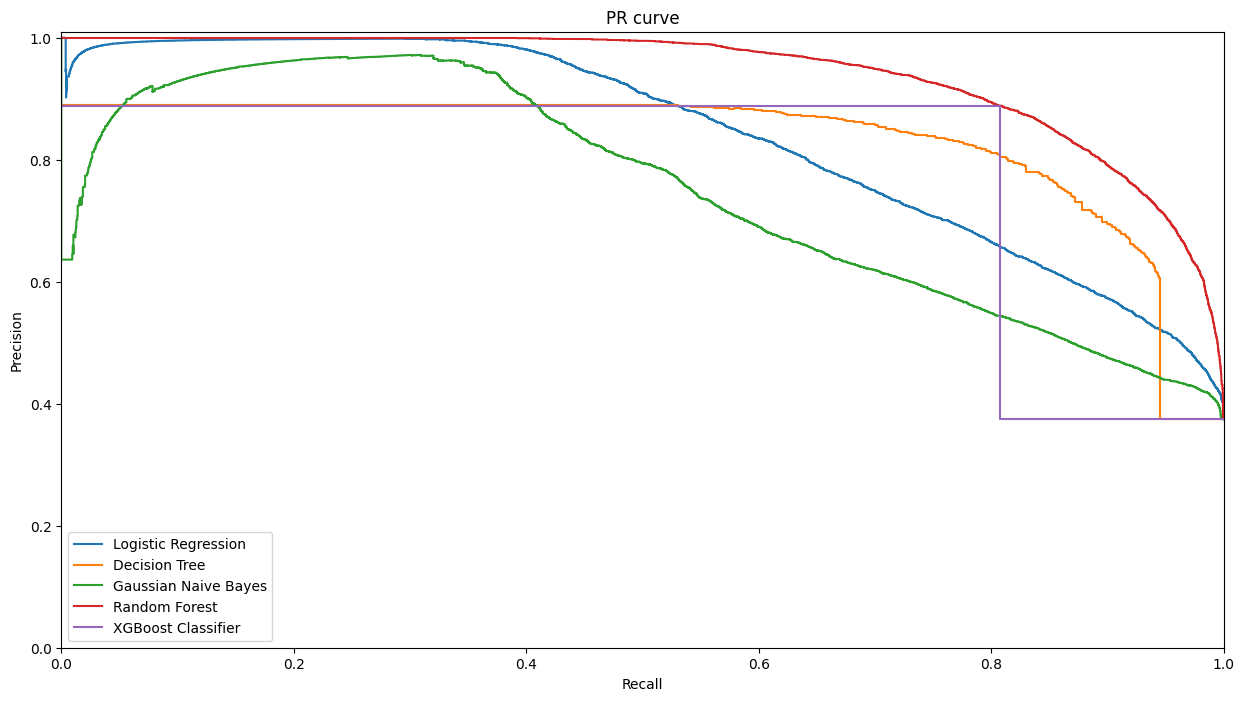

In [140]:
plt.figure(figsize=(15, 8))
for key in f1.keys():
    plt.step(recall[key], precision[key], where="post", label=key)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR curve")
plt.legend()
plt.show()

### 4. ROC curves of different models

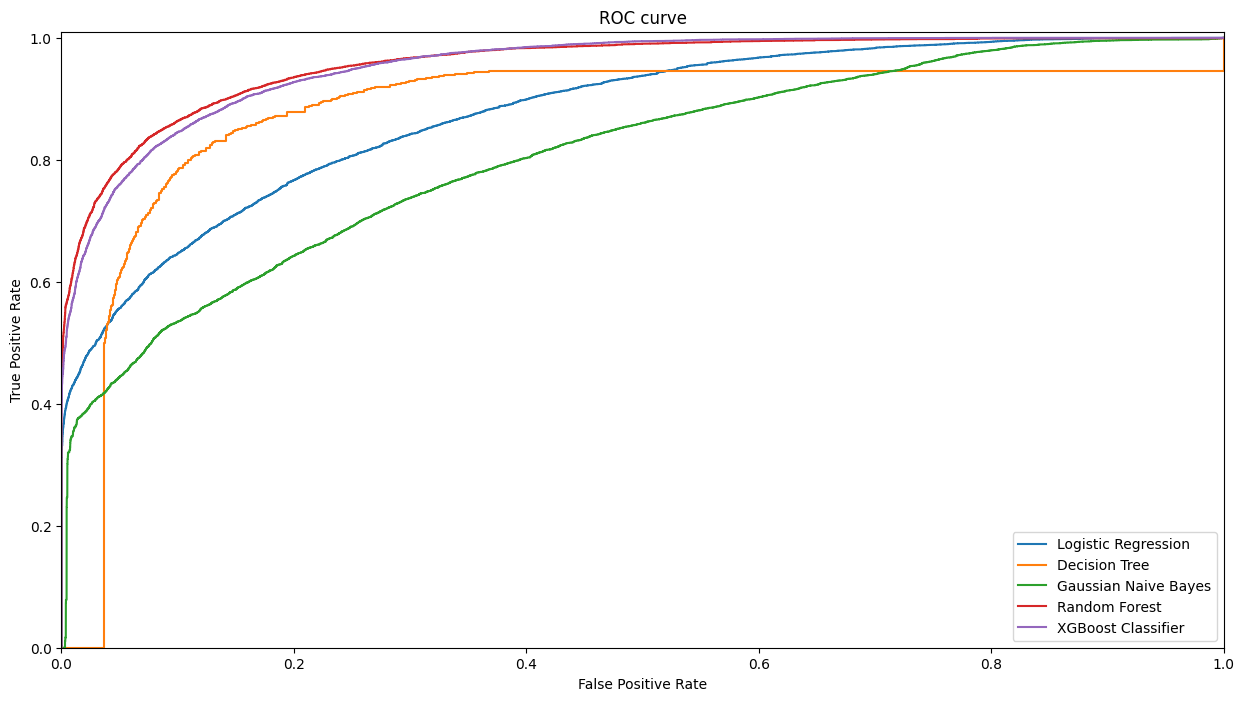

In [141]:
plt.figure(figsize=(15, 8))
for key in f1.keys():
    plt.step(fpr[key], tpr[key], where="post", label=key)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("ROC curve")
plt.legend()
plt.show()